## Holm, et al - Gene Analysis of Progenitor Cell RNASeq Data
### Aged Bone Marrow (normal control) vs. Myeloproliferative Neoplasms (MPN) 

Aged bone marrow: 'X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0' 
PV: 'X598.PB.Prog_S0', 'X575A.PB.Prog_S0', 'X562.PB.Prog_S0', 'X662.BM.Prog_S4', 'X690.BM.Prog_S5', 'X689.BM.Prog_S11'
Essential Thrombocythemia (ET): 'X431.PB.Prog', 'X638.BM.Prog' 
Myelofibrosis (MF): 'X724.PB.Prog_S3', 'X668.PB.Prog_S2', 'X736.BM.Prog_S0', 'X600.PB.Prog', 'X732.PB.Prog', 'X580.BM.Prog', 'X664.BM.Prog', 'X428.PB.Prog', 'X725.PB.Prog', 'X566.PB.Prog', 'X600.BM.Prog', 'X407.PB.Prog', 'X569.PB.Prog', 'X581.PB.Prog', 'X599.PB.Prog', 'X621.PB.Prog', 'X767.BM.Prog', 'X744.PB.Prog', 'X560.PB.Prog',
'X576.PB.Prog', 'X573.BM.Prog', 'X670A.PB.Prog', 'X670B.PB.Prog', 'X666.PB.Prog'
Chronic Myeloid Leukemia (CML): 'X608.BM.Prog', 'X616.BM.Prog', 'X571.BM.Prog', 'X727.PB.Prog', 'X703.PB.Prog'
Acute Myeloid Leukemia (AML): '672B.PB.Prog', '19_MDStoAML', '20_MDStoAML', '48_MDStoAML', '36', '42', '87', '89', '102', '107'

RNAseq Differential Expression Analysis, QC, functional enrichment analysis
Authors: Art Nasamran, M.S. Cnasamran@ucsd.edu and Kathleen Fisch, Ph.D. Kfisch@ucsd.edu
February 2018
The analysis notebook below that is adapted from the Bioconductor RNASeq123 workflow. It has been edited by Kathleen Fisch (CCBB). https://www.bioconductor.org/help/workflows/RNAseq123/

Primary Analysis Pipeline
QC - FASTQC Alignment -- STARv2.5.3a Quantification -- RSEM-1.3.0 Human genome -- hg19 Annotation -- Gencode v19

In [11]:
#install.packages("R.utils", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gplots", destdir="/mnt/data1/tomw/R/R-3.4.3/")

#source("http://bioconductor.org/biocLite.R")
#biocLite("BiocUpgrade")
#update.packages(instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("pathview", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("edgeR", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Glimma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Mus.musculus")
#biocLite("Homo.sapiens", instlib="/mnt/data1/tomw/R/R-3.4.3/",)
#install.packages("splitstackshape", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("PoiClaClu", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("statmod", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("plyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
install.packages("dplyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gdata", destdir="/mnt/data1/tomw/R/R-3.4.3/")

Installing package into ‘/home/tomw/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [12]:
library(IRdisplay)
library(limma)
library(edgeR)
library(Glimma)
#library(Mus.musculus)
library(Homo.sapiens)
library(splitstackshape)
library(PoiClaClu)
library(statmod)
library(plyr)
library(dplyr)
library(gdata)
library(org.Hs.eg.db)
library(gplots)
EG2SYM <- toTable(org.Hs.egSYMBOL)


In [13]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /mnt/data1/tomw/anaconda2/lib/R/lib/libRblas.so
LAPACK: /mnt/data1/tomw/anaconda2/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] bindrcpp_0.2                           
 [2] gplots_3.0.1.1                         
 [3] gdata_2.18.0                           
 [4] dplyr_0.7.4                            
 [5] plyr_1.8.4                             
 [6] statmod_1.4.30    

### Preprocess RNASeq Count Data and metadata

In [2]:
name <- "comp2"
name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)

[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


In [3]:
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])
head(ENS2EG2SYM)

gene_id,ens_id.gene_id,ens_id.ensembl_id,SYM
<fct>,<chr>,<chr>,<fct>
1,1,ENSG00000121410,A1BG
2,2,ENSG00000175899,A2M
3,3,ENSG00000256069,A2MP1
9,9,ENSG00000171428,NAT1
10,10,ENSG00000156006,NAT2
12,12,ENSG00000196136,SERPINA3


In [58]:
meta <- read.csv("combined_meta.csv", stringsAsFactors=FALSE)
meta$CellType <- rep("BM", nrow(meta))
types <- unlist(lapply(meta$ID, function(x) strsplit(x, split="\\.")[[1]][2]))
meta$CellType[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
head(meta)
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]
genes2 <- plyr::ddply(AnnotationDbi::select(Homo.sapiens,
                        keys=gsub("[.].*$","", rownames(gene_counts_new)),
                        columns = c("SYMBOL", "ENSEMBL", "ENTREZID"),
                        keytype="ENSEMBL"), "ENSEMBL", function(X){X[1,]})

meta2 <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20180326.csv", header=TRUE, stringsAsFactors = FALSE)

meta$Sex <- meta2[match(gsub("_S[0-9]+$","",meta$Sample), 
                        gsub("_S[0-9]+$","",meta2$Sample)), "Sex"] 


File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
27_8,X27_8,368-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,368,NA,BM
22_10,X22_10,369s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,369,NA,BM
26_2,X26_2,401-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,401,NA,BM
26_1,X26_1,410-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,410,NA,BM
26_7,X26_7,439-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,439,NA,BM
439sp1,X439sp1,439s-p1,Aged normal bone marrow,Aged,Normal,Stroma p1,439,NA,BM


'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


[1]  0 11

[1] "27_8"           "22_10"          "26_2"           "26_1"          
  [5] "26_7"           "439sp1"         "586sp1"         "22_13"         
  [9] "22_14"          "368_ACAGTG_S0"  "380_ACAGTG_S0"  "401_ACAGTG_S0" 
 [13] "402_ACAGTG_S0"  "410_ACAGTG_S0"  "415_ACAGTG_S0"  "416_ACAGTG_S0" 
 [17] "426_ACAGTG_S0"  "591.BM.Prog"    "591.BM.Stem"    "591.PB.Stem"   
 [21] "591.Stroma"     "672A.PB.Prog"   "672A.PB.Stem"   "672B.PB.Prog"  
 [25] "672B.PB.Stem"   "735.PB.Prog"    "735.PB.Stem"    "571.BM.Prog"   
 [29] "571.BM.Stem"    "571.Stroma"     "608.BM.Prog"    "608.BM.Stem"   
 [33] "616.BM.Prog"    "616.BM.Stem"    "703.PB.Prog"    "703.PB.Stem"   
 [37] "727.PB.Prog"    "727.PB.Stem"    "20_MDStoAML"    "19_MDStoAML"   
 [41] "431.PB.Prog"    "431.PB.Stem"    "638.BM.Prog"    "638.BM.Stem"   
 [45] "638.Stroma"     "641.Stroma"     "65_MDStoAML"    "96"            
 [49] "97"             "91"             "407.PB.Prog"    "407.PB.Stem"   
 [53] "422.PB.Stem"    "428.PB.Prog"    "428.PB.Stem"    "558.Stroma"    
 [57] "560.PB.Prog"    "560.PB.Stem"    "566.PB.Prog"    "566.PB.Stem"   
 [61] "567.PB.Stem"    "569.PB.Prog"    "569.PB.Stem"    "573.BM.Prog"   
 [65] "573.BM.Stem"    "573.Stroma"     "576.PB.Prog"    "576.PB.Stem"   
 [69] "580.BM.Prog"    "580.BM.Stem"    "581.PB.Prog"    "581.PB.Stem"   
 [73] "599.PB.Prog"    "599.PB.Stem"    "600.BM.Prog"    "600.BM.Stem"   
 [77] "600.PB.Prog"    "600.PB.Stem"    "621.PB.Prog"    "621.PB.Stem"   
 [81] "664.BM.Prog"    "664.BM.Stem"    "664.Stroma"     "666.PB.Prog"   
 [85] "666.PB.Stem"    "668.PB.Prog"    "668.PB.Stem"    "670A.PB.Prog"  
 [89] "670A.PB.Stem"   "670B.PB.Prog"   "670B.PB.Stem"   "721.PB.34+"    
 [93] "724.PB.Prog"    "724.PB.Stem"    "725.PB.Prog"    "732.PB.Prog"   
 [97] "736.BM.Prog"    "736.BM.Stem"    "744.PB.Prog"    "744.PB.Stem"   
[101] "767.BM.Prog"    "767.BM.Stem"    "767.Stroma"     "562.PB.Prog"   
[105] "562.PB.Stem"    "575.Stroma"     "575A.PB.Prog"   "598.PB.Prog"   
[109] "598.PB.Stem"    "662.BM.Prog"    "662.Stroma"     "689.BM.Prog"   
[113] "689.BM.Stem"    "689.BM.Strom"   "690.BM.Prog"    "690.Stroma"    
[117] "728.Stroma"     "730.Stroma"     "102"            "89"            
[121] "87"             "36"             "42"             "107"           
[125] "48_MDStoAML"    "26_3"           "22_15"          "26_4"          
[129] "22_16"          "4689sp1"        "26_5"           "26_6"          
[133] "4727sp1"        "4018_GTGAAA_S0" "4040_GTGAAA_S0" "4066_GTGAAA_S0"
[137] "4188_GTGAAA_S0" "4215_GTGAAA_S0" "4218_GTGAAA_S0" "4259_GTGAAA_S0"
[141] "4279_GTGAAA_S0"

### Prepare count data and metadata for 2 group comparisons

In [59]:
group.ABM.ET.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                     'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                     'X431.PB.Prog_S0', 'X638.BM.Prog_S1')

geneCountCrop.ABM.ET.PB <- gene_counts_new[, group.ABM.ET.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.ET.PB)[1:8], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.ET.PB)[9:10]))
metaCrop.ABM.ET.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.ET.PB <- geneCountCrop.ABM.ET.PB

metaCrop.ABM.ET.PB$Sample <- reorder.factor(metaCrop.ABM.ET.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.ET.PB <- metaCrop.ABM.ET.PB[order(metaCrop.ABM.ET.PB$Sample),] #%>% arrange(Sample)

In [60]:
group.ABM.PV.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                        'X598.PB.Prog_S0', 'X575A.PB.Prog_S0', 
                        'X562.PB.Prog_S0', 'X662.BM.Prog_S4', 'X690.BM.Prog_S5', 
                        'X689.BM.Prog_S11')
geneCountCrop.ABM.PV.PB <- gene_counts_new[, group.ABM.PV.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.PV.PB)[1:14])
metaCrop.ABM.PV.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.PV.PB <- geneCountCrop.ABM.PV.PB

metaCrop.ABM.PV.PB$Sample <- reorder.factor(metaCrop.ABM.PV.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.PV.PB <- metaCrop.ABM.PV.PB[order(metaCrop.ABM.PV.PB$Sample),] #%>% arrange(Sample)

In [61]:
colnames(gene_counts_new)[sapply(c('X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                        'X566.PB.Prog', 'X600.BM.Prog', 'X407.PB.Prog', 'X569.PB.Prog', 'X581.PB.Prog',
                        'X599.PB.Prog', 'X621.PB.Prog', 'X767.BM.Prog', 'X744.PB.Prog', 'X560.PB.Prog',
                        'X576.PB.Prog', 'X573.BM.Prog', 'X670A.PB.Prog', 'X670B.PB.Prog', 'X666.PB.Prog'), 
                                 function(x) grep(x, colnames(gene_counts_new)))]
                                  
group.ABM.MF.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                        'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2')
geneCountCrop.ABM.MF.PB <- gene_counts_new[, group.ABM.MF.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.MF.PB)[1:11], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.MF.PB)[12:32]))
metaCrop.ABM.MF.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.MF.PB <- geneCountCrop.ABM.MF.PB

metaCrop.ABM.MF.PB$Sample <- reorder.factor(metaCrop.ABM.MF.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.MF.PB <- metaCrop.ABM.MF.PB[order(metaCrop.ABM.MF.PB$Sample),] #%>% arrange(Sample)

[1] "X724.PB.Prog_S3"  "X668.PB.Prog_S2"  "X736.BM.Prog_S0"  "X600.PB.Prog_S0" 
 [5] "X732.PB.Prog_S5"  "X580.BM.Prog_S0"  "X664.BM.Prog_S4"  "X428.PB.Prog_S0" 
 [9] "X725.PB.Prog_S7"  "X566.PB.Prog_S0"  "X600.BM.Prog_S0"  "X407.PB.Prog_S0" 
[13] "X569.PB.Prog_S0"  "X581.PB.Prog_S2"  "X599.PB.Prog_S0"  "X621.PB.Prog_S2" 
[17] "X767.BM.Prog_S0"  "X744.PB.Prog_S0"  "X560.PB.Prog_S0"  "X576.PB.Prog_S0" 
[21] "X573.BM.Prog_S0"  "X670A.PB.Prog_S3" "X670B.PB.Prog_S2" "X666.PB.Prog_S2"

In [62]:
colnames(gene_counts_new)[sapply(c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 'X703.PB.Prog_S13'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
                                     
group.ABM.CML.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 'X703.PB.Prog_S13')
geneCountCrop.ABM.CML.PB <- gene_counts_new[, group.ABM.CML.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.CML.PB)[1:8], 
                           gsub("_S[0-9]+$", "", colnames(geneCountCrop.ABM.CML.PB)[9:13]))
metaCrop.ABM.CML.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.CML.PB <- geneCountCrop.ABM.CML.PB

metaCrop.ABM.CML.PB$Sample <- reorder.factor(metaCrop.ABM.CML.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.CML.PB <- metaCrop.ABM.CML.PB[order(metaCrop.ABM.CML.PB$Sample),] #%>% arrange(Sample)

[1] "X368_ACAGTG_S0"   "X380_ACAGTG_S0"   "X401_ACAGTG_S0"   "X402_ACAGTG_S0"  
 [5] "X410_ACAGTG_S0"   "X415_ACAGTG_S0"   "X416_ACAGTG_S0"   "X426_ACAGTG_S0"  
 [9] "X608.BM.Prog_S3"  "X616.BM.Prog_S0"  "X571.BM.Prog_S0"  "X727.PB.Prog_S4" 
[13] "X703.PB.Prog_S13"

In [63]:
colnames(gene_counts_new)[sapply(c('X735.PB.Prog', 'X591.BM.Prog', 'X672A.PB.Prog', 'X672B.PB.Prog'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
                                     
group.ABM.AML.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X735.PB.Prog_S8', 'X591.BM.Prog_S0', 'X672A.PB.Prog_S3', 'X672B.PB.Prog_S0')

geneCountCrop.ABM.AML.PB <- gene_counts_new[, group.ABM.AML.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.AML.PB)[1:12])
metaCrop.ABM.AML.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.AML.PB <- geneCountCrop.ABM.AML.PB

metaCrop.ABM.AML.PB$Sample <- reorder.factor(metaCrop.ABM.AML.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.AML.PB <- metaCrop.ABM.AML.PB[order(metaCrop.ABM.AML.PB$Sample),] #%>% arrange(Sample)

[1] "X735.PB.Prog_S8"  "X591.BM.Prog_S0"  "X672A.PB.Prog_S3" "X672B.PB.Prog_S0"

In [64]:
colnames(gene_counts_new)[sapply(c('X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 
                                   'X703.PB.Prog_S13','X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.CML.MF.PB <- c('X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 'X703.PB.Prog_S13', 
                       'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', #'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       #'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2')
geneCountCrop.CML.MF.PB <- gene_counts_new[, group.CML.MF.PB]

geneCount_names_order <- c(gsub("_S[0-9]+$", "", colnames(geneCountCrop.CML.MF.PB)[1:5]),
                           colnames(geneCountCrop.CML.MF.PB)[6:8], 
                           gsub("_S[0-9]+$", "", colnames(geneCountCrop.CML.MF.PB)[9:29]))

metaCrop.CML.MF.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.CML.MF.PB <- geneCountCrop.CML.MF.PB

metaCrop.CML.MF.PB$Sample <- reorder.factor(metaCrop.CML.MF.PB$Sample, new.order=geneCount_names_order)
metaCrop.CML.MF.PB <- metaCrop.CML.MF.PB[order(metaCrop.CML.MF.PB$Sample),]# %>% arrange(Sample)

[1] "X608.BM.Prog_S3"  "X616.BM.Prog_S0"  "X571.BM.Prog_S0"  "X727.PB.Prog_S4" 
 [5] "X703.PB.Prog_S13" "X724.PB.Prog_S3"  "X668.PB.Prog_S2"  "X736.BM.Prog_S0" 
 [9] "X600.PB.Prog_S0"  "X732.PB.Prog_S5"  "X580.BM.Prog_S0"  "X664.BM.Prog_S4" 
[13] "X428.PB.Prog_S0"  "X725.PB.Prog_S7"  "X566.PB.Prog_S0"  "X600.BM.Prog_S0" 
[17] "X407.PB.Prog_S0"  "X569.PB.Prog_S0"  "X581.PB.Prog_S2"  "X599.PB.Prog_S0" 
[21] "X621.PB.Prog_S2"  "X767.BM.Prog_S0"  "X744.PB.Prog_S0"  "X560.PB.Prog_S0" 
[25] "X576.PB.Prog_S0"  "X573.BM.Prog_S0"  "X670A.PB.Prog_S3" "X670B.PB.Prog_S2"
[29] "X666.PB.Prog_S2"

In [65]:
colnames(gene_counts_new)[sapply(c('X735.PB.Prog_S8', 'X591.BM.Prog_S0', 'X672A.PB.Prog_S3', 'X672B.PB.Prog_S0',
                                   'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.AML.MF.PB <- c('X735.PB.Prog_S8', 'X591.BM.Prog_S0', 'X672A.PB.Prog_S3', 'X672B.PB.Prog_S0', 
                       'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', #'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       #'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2')

geneCountCrop.AML.MF.PB <- gene_counts_new[, group.AML.MF.PB]

geneCount_names_order <- c(colnames(geneCountCrop.AML.MF.PB)[1:7], 
                           gsub("_S[0-9]+$", "", colnames(geneCountCrop.AML.MF.PB)[8:28]))

metaCrop.AML.MF.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.AML.MF.PB <- geneCountCrop.AML.MF.PB

metaCrop.AML.MF.PB$Sample <- reorder.factor(metaCrop.AML.MF.PB$Sample, new.order=geneCount_names_order)
metaCrop.AML.MF.PB <- metaCrop.AML.MF.PB[order(metaCrop.AML.MF.PB$Sample),] #%>% arrange(Sample)


[1] "X735.PB.Prog_S8"  "X591.BM.Prog_S0"  "X672A.PB.Prog_S3" "X672B.PB.Prog_S0"
 [5] "X724.PB.Prog_S3"  "X668.PB.Prog_S2"  "X736.BM.Prog_S0"  "X600.PB.Prog_S0" 
 [9] "X732.PB.Prog_S5"  "X580.BM.Prog_S0"  "X664.BM.Prog_S4"  "X428.PB.Prog_S0" 
[13] "X725.PB.Prog_S7"  "X566.PB.Prog_S0"  "X600.BM.Prog_S0"  "X407.PB.Prog_S0" 
[17] "X569.PB.Prog_S0"  "X581.PB.Prog_S2"  "X599.PB.Prog_S0"  "X621.PB.Prog_S2" 
[21] "X767.BM.Prog_S0"  "X744.PB.Prog_S0"  "X560.PB.Prog_S0"  "X576.PB.Prog_S0" 
[25] "X573.BM.Prog_S0"  "X670A.PB.Prog_S3" "X670B.PB.Prog_S2" "X666.PB.Prog_S2"

In [44]:
library(RColorBrewer)
load("gencodev19_ANNOT.RData")
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )

#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

pcgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", protein_coding_ids),]
ncgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", ncRNA_ids),]
head(pcgenes)

ENSEMBL,ENTREZID,SYMBOL
<chr>,<chr>,<chr>
ENSG00000000003,7105,TSPAN6
ENSG00000000005,64102,TNMD
ENSG00000000419,8813,DPM1
ENSG00000000457,57147,SCYL3
ENSG00000000460,55732,C1orf112
ENSG00000000938,2268,FGR


### Prepare DGEList and generate MDS plots

[1] 20345    10

[1] 9324   10

Warning message in brewer.pal(nlevels(col.samp.ABM.ET.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

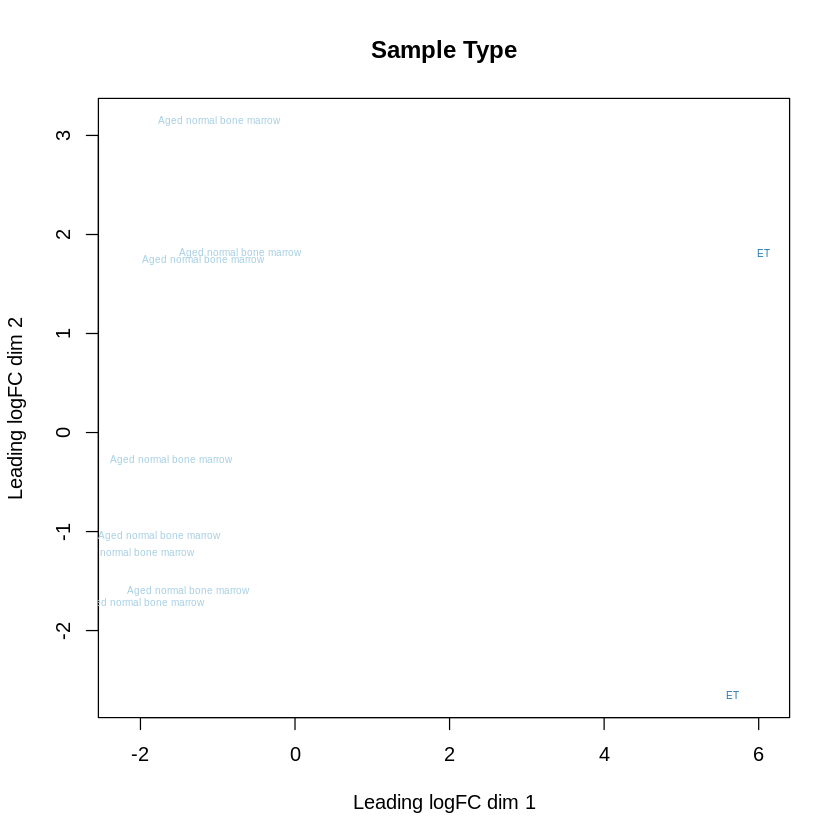

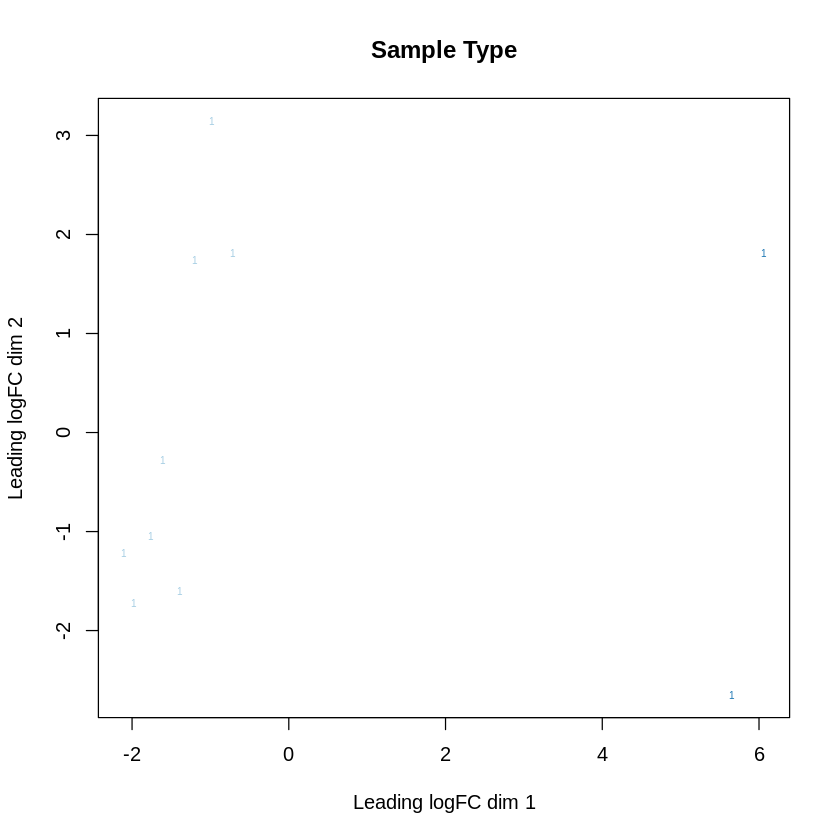

In [66]:
geneCount_coding.ABM.ET.PB <- subset(geneCount.ABM.ET.PB, row.names(geneCount.ABM.ET.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.ET.PB))
rownames(geneCount_coding.ABM.ET.PB) <- id_list
x.ABM.ET.PB <- DGEList(counts = geneCount_coding.ABM.ET.PB, lib.size = colSums(geneCount_coding.ABM.ET.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.ET.PB)), samples = metaCrop.ABM.ET.PB,
group = metaCrop.ABM.ET.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.ET.PB)
x.ABM.ET.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.ET.PB)
lcpm <- cpm(x.ABM.ET.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=10
x.ABM.ET.PB <- x.ABM.ET.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.ET.PB)
x.ABM.ET.PB <- calcNormFactors(x.ABM.ET.PB, method = "TMM")
col.samp.ABM.ET.PB <- samp.type.ABM.ET.PB <- as.factor(x.ABM.ET.PB$samples$Sample.type)
levels(col.samp.ABM.ET.PB) <-  brewer.pal(nlevels(col.samp.ABM.ET.PB), "Paired") #if more than 2 conditions
col.samp.ABM.ET.PB <- as.character(col.samp.ABM.ET.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.ET.PB, col=col.samp.ABM.ET.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.ET.PB$samples$group, col=col.samp.ABM.ET.PB, cex=.5)
title(main="Sample Type")

[1] 20345    14

[1] 8650   14

Warning message in brewer.pal(nlevels(col.samp.ABM.PV.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

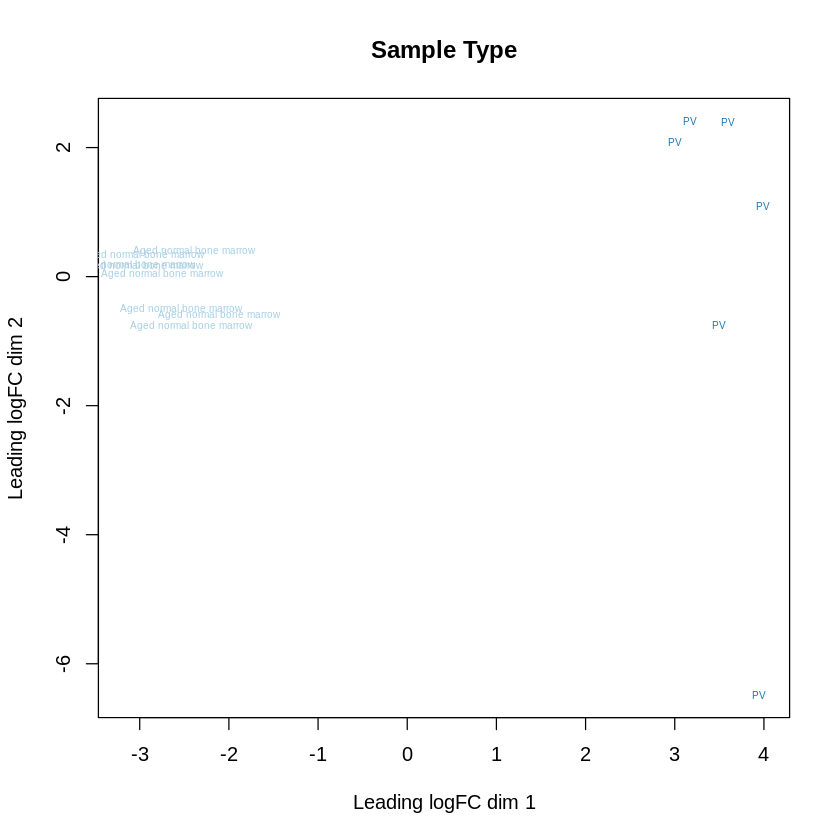

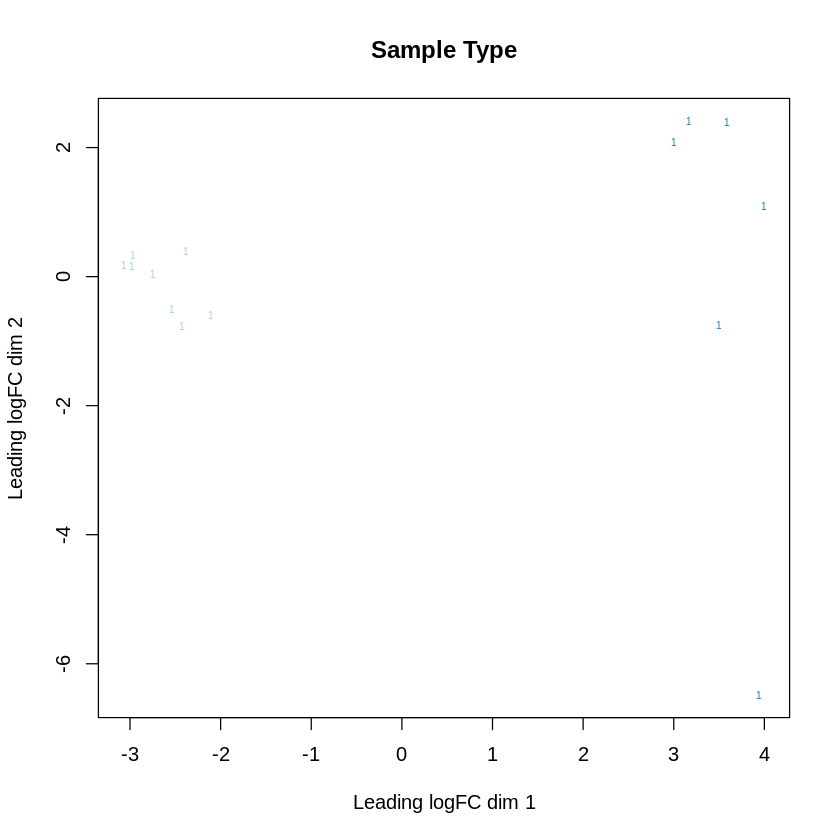

In [67]:
geneCount_coding.ABM.PV.PB <- subset(geneCount.ABM.PV.PB, row.names(geneCount.ABM.PV.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.PV.PB))
rownames(geneCount_coding.ABM.PV.PB) <- id_list
x.ABM.PV.PB <- DGEList(counts = geneCount_coding.ABM.PV.PB, lib.size = colSums(geneCount_coding.ABM.PV.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.PV.PB)), samples = metaCrop.ABM.PV.PB,
group = metaCrop.ABM.PV.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.PV.PB)
x.ABM.PV.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.PV.PB)
lcpm <- cpm(x.ABM.PV.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=14
x.ABM.PV.PB <- x.ABM.PV.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.PV.PB)
x.ABM.PV.PB <- calcNormFactors(x.ABM.PV.PB, method = "TMM")
col.samp.ABM.PV.PB <- samp.type.ABM.PV.PB <- as.factor(x.ABM.PV.PB$samples$Sample.type)
levels(col.samp.ABM.PV.PB) <-  brewer.pal(nlevels(col.samp.ABM.PV.PB), "Paired") #if more than 2 conditions
col.samp.ABM.PV.PB <- as.character(col.samp.ABM.PV.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.PV.PB, col=col.samp.ABM.PV.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.PV.PB$samples$group, col=col.samp.ABM.PV.PB, cex=.5)
title(main="Sample Type")

[1] 20345    32

[1] 12055    32

Warning message in brewer.pal(nlevels(col.samp.ABM.MF.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

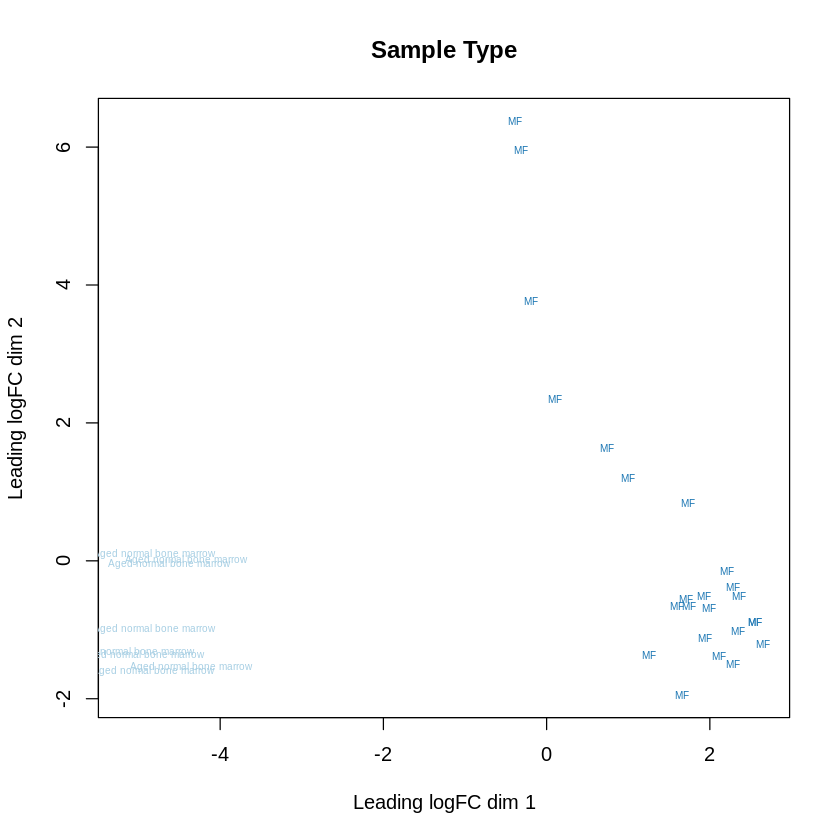

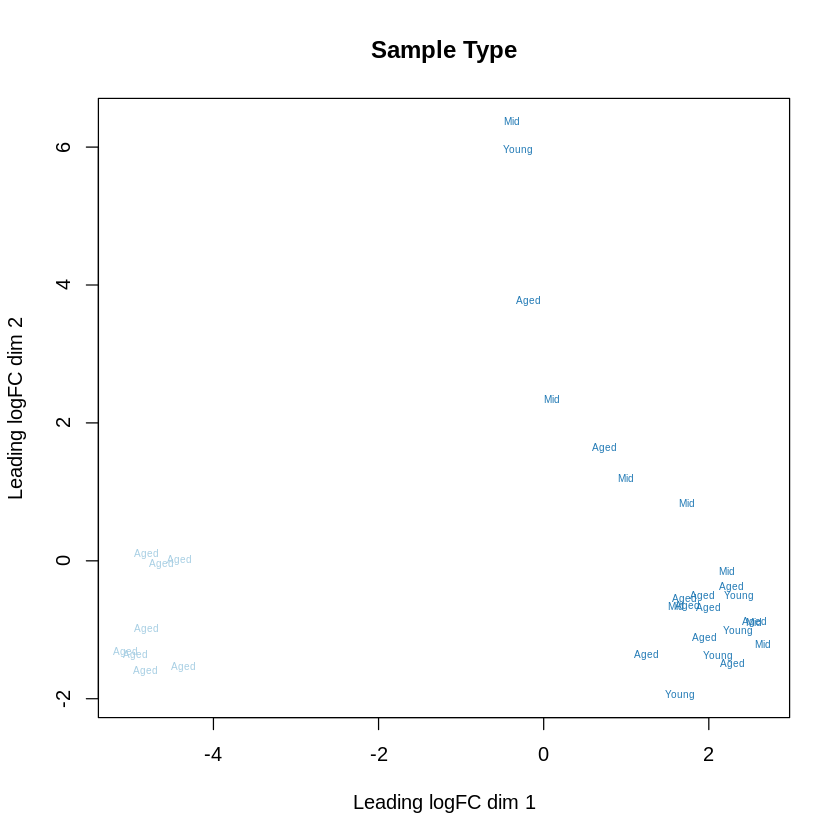

In [68]:
geneCount_coding.ABM.MF.PB <- subset(geneCount.ABM.MF.PB, row.names(geneCount.ABM.MF.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.MF.PB))
rownames(geneCount_coding.ABM.MF.PB) <- id_list
x.ABM.MF.PB <- DGEList(counts = geneCount_coding.ABM.MF.PB, lib.size = colSums(geneCount_coding.ABM.MF.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.MF.PB)), samples = metaCrop.ABM.MF.PB,
group = metaCrop.ABM.MF.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.MF.PB)
x.ABM.MF.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.MF.PB)
lcpm <- cpm(x.ABM.MF.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=16
x.ABM.MF.PB <- x.ABM.MF.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.MF.PB)
x.ABM.MF.PB <- calcNormFactors(x.ABM.MF.PB, method = "TMM")
col.samp.ABM.MF.PB <- samp.type.ABM.MF.PB <- as.factor(x.ABM.MF.PB$samples$Sample.type)
levels(col.samp.ABM.MF.PB) <-  brewer.pal(nlevels(col.samp.ABM.MF.PB), "Paired") #if more than 2 conditions
col.samp.ABM.MF.PB <- as.character(col.samp.ABM.MF.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.MF.PB, col=col.samp.ABM.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.MF.PB$samples$Age, col=col.samp.ABM.MF.PB, cex=.5)
title(main="Sample Type")

In [ ]:
geneCount_coding.ABM.CML.PB <- subset(geneCount.ABM.CML.PB, row.names(geneCount.ABM.CML.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.CML.PB))
rownames(geneCount_coding.ABM.CML.PB) <- id_list
x.ABM.CML.PB <- DGEList(counts = geneCount_coding.ABM.CML.PB, lib.size = colSums(geneCount_coding.ABM.CML.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.CML.PB)), samples = metaCrop.ABM.CML.PB,
group = metaCrop.ABM.CML.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.CML.PB)
x.ABM.CML.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.CML.PB)
lcpm <- cpm(x.ABM.CML.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=13
x.ABM.CML.PB <- x.ABM.CML.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.CML.PB)
x.ABM.CML.PB <- calcNormFactors(x.ABM.CML.PB, method = "TMM")
col.samp.ABM.CML.PB <- samp.type.ABM.CML.PB <- as.factor(x.ABM.CML.PB$samples$Sample.type)
levels(col.samp.ABM.CML.PB) <-  brewer.pal(nlevels(col.samp.ABM.CML.PB), "Paired") #if more than 2 conditions
col.samp.ABM.CML.PB <- as.character(col.samp.ABM.CML.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.CML.PB, col=col.samp.ABM.CML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.CML.PB$samples$group, col=col.samp.ABM.CML.PB, cex=.5)
title(main="Sample Type")

[1] 20345    12

[1] 6136   12

Warning message in brewer.pal(nlevels(col.samp.ABM.AML.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

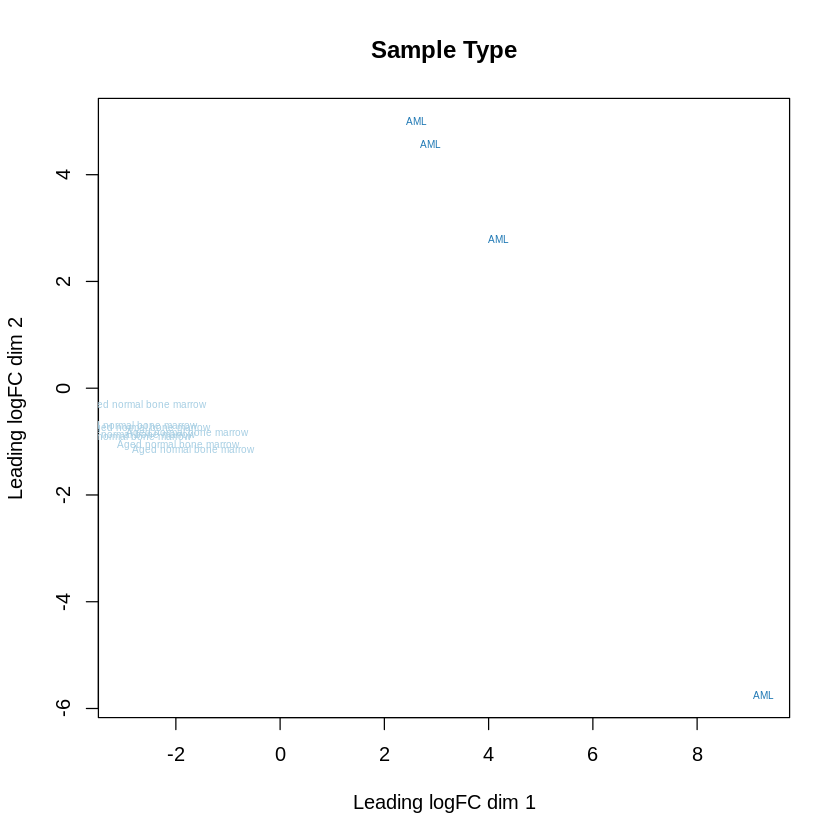

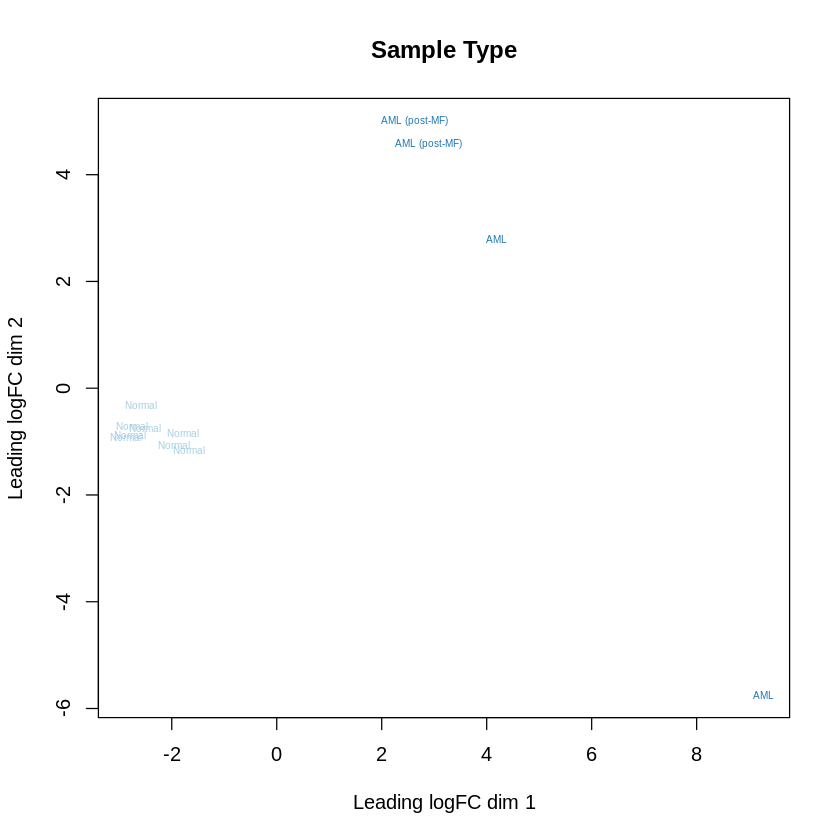

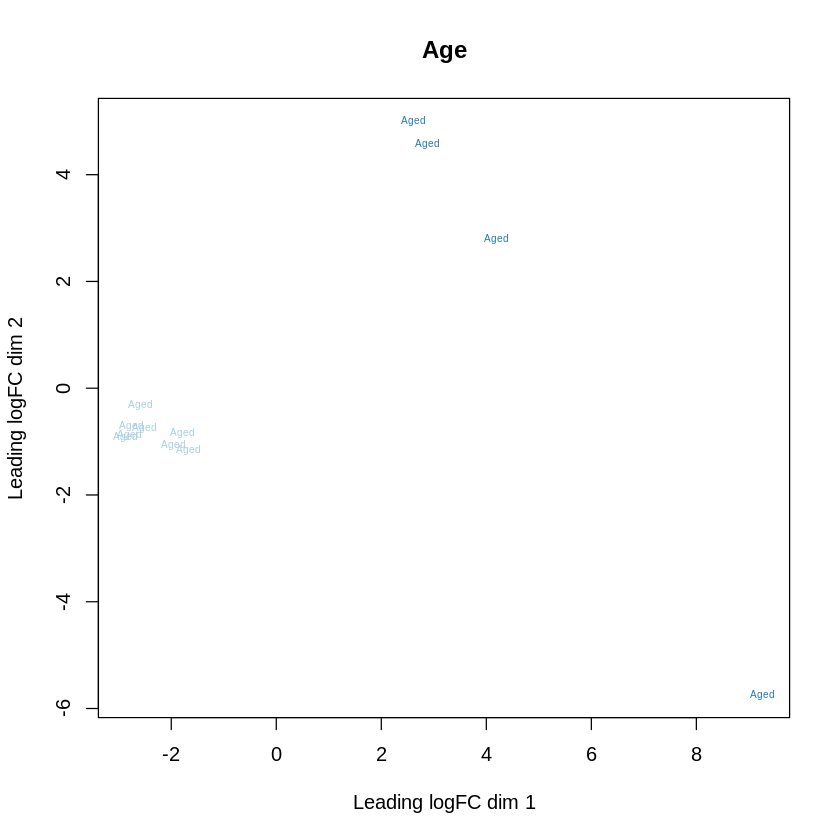

In [71]:
geneCount_coding.ABM.AML.PB <- subset(geneCount.ABM.AML.PB, row.names(geneCount.ABM.AML.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.AML.PB))
rownames(geneCount_coding.ABM.AML.PB) <- id_list
x.ABM.AML.PB <- DGEList(counts = geneCount_coding.ABM.AML.PB, lib.size = colSums(geneCount_coding.ABM.AML.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.AML.PB)), samples = metaCrop.ABM.AML.PB,
group = metaCrop.ABM.AML.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.AML.PB)
x.ABM.AML.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.AML.PB)
lcpm <- cpm(x.ABM.AML.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=12
x.ABM.AML.PB <- x.ABM.AML.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.AML.PB)
x.ABM.AML.PB <- calcNormFactors(x.ABM.AML.PB, method = "TMM")
col.samp.ABM.AML.PB <- samp.type.ABM.AML.PB <- as.factor(x.ABM.AML.PB$samples$Sample.type)
levels(col.samp.ABM.AML.PB) <-  brewer.pal(nlevels(col.samp.ABM.AML.PB), "Paired") #if more than 2 conditions
col.samp.ABM.AML.PB <- as.character(col.samp.ABM.AML.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.AML.PB, col=col.samp.ABM.AML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.AML.PB$samples$Condition, col=col.samp.ABM.AML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.AML.PB$samples$Age, col=col.samp.ABM.AML.PB, cex=.5)
title(main="Age")

In [ ]:
geneCount_coding.CML.MF.PB <- subset(geneCount.CML.MF.PB, row.names(geneCount.CML.MF.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.CML.MF.PB))
rownames(geneCount_coding.CML.MF.PB) <- id_list
x.CML.MF.PB <- DGEList(counts = geneCount_coding.CML.MF.PB, lib.size = colSums(geneCount_coding.CML.MF.PB),
norm.factors = rep(1,ncol(geneCount_coding.CML.MF.PB)), samples = metaCrop.CML.MF.PB,
group = metaCrop.CML.MF.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.CML.MF.PB)
x.CML.MF.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.CML.MF.PB)
lcpm <- cpm(x.CML.MF.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=26
x.CML.MF.PB <- x.CML.MF.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.CML.MF.PB)
x.CML.MF.PB <- calcNormFactors(x.CML.MF.PB, method = "TMM")
x.CML.MF.PB$samples$norm.factors
col.samp.CML.MF.PB <- samp.type.CML.MF.PB <- as.factor(x.CML.MF.PB$samples$Sample.type)
levels(col.samp.CML.MF.PB) <-  brewer.pal(nlevels(col.samp.CML.MF.PB), "Paired") #if more than 2 conditions
col.samp.CML.MF.PB <- as.character(col.samp.CML.MF.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.CML.MF.PB, col=col.samp.CML.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.CML.MF.PB$samples$group, col=col.samp.CML.MF.PB, cex=.5)
title(main="Sample Type")

[1] 20345    26

[1] 6680   26

[1] 0.9384762 0.8669014 0.8424180 0.9890997 1.0339389 1.0283584 1.1030943
 [8] 0.9208322 0.8834607 1.0501897 1.1011466 0.8254077 1.0718295 1.1011026
[15] 1.0672812 1.0536090 1.0626020 0.9492557 1.0961787 1.0413066 0.9744139
[22] 0.9751872 0.9578412 1.0574032 1.1012207 1.0001669

Warning message in brewer.pal(nlevels(col.samp.AML.MF.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

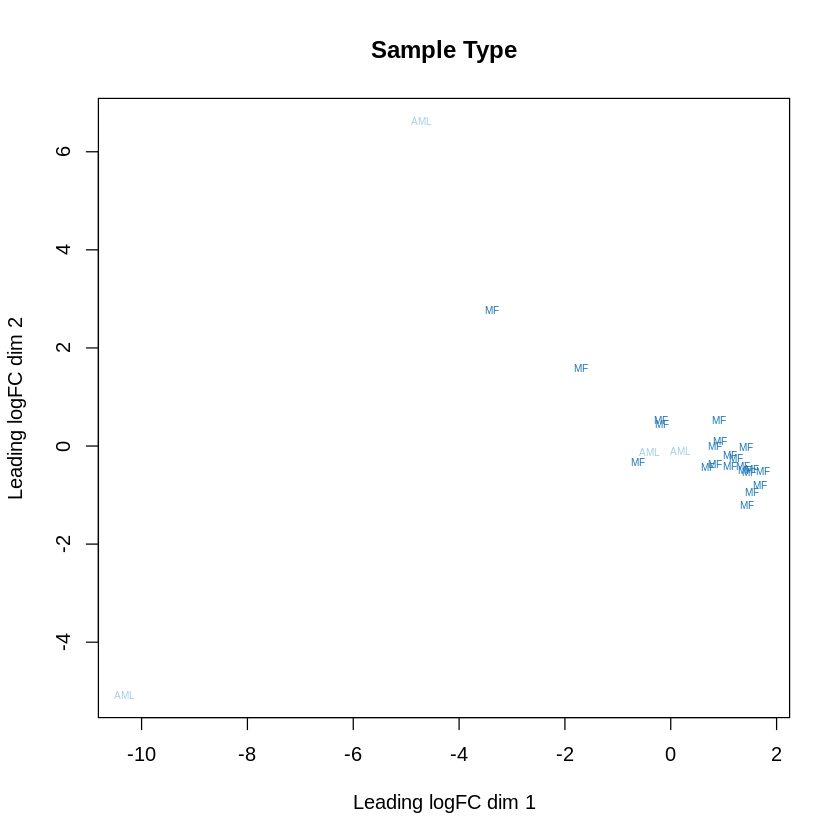

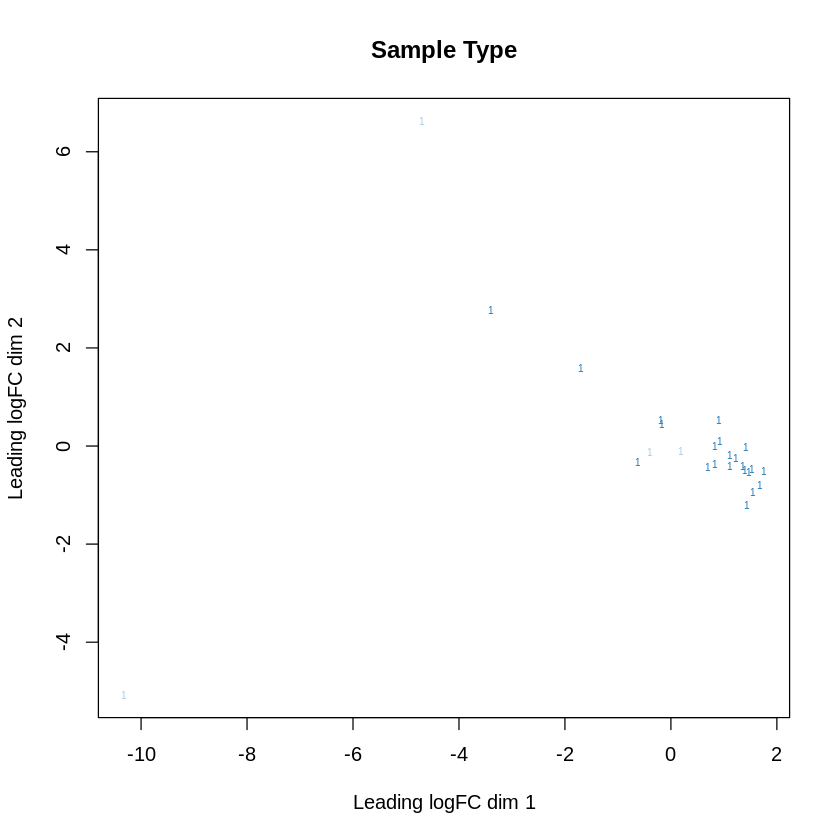

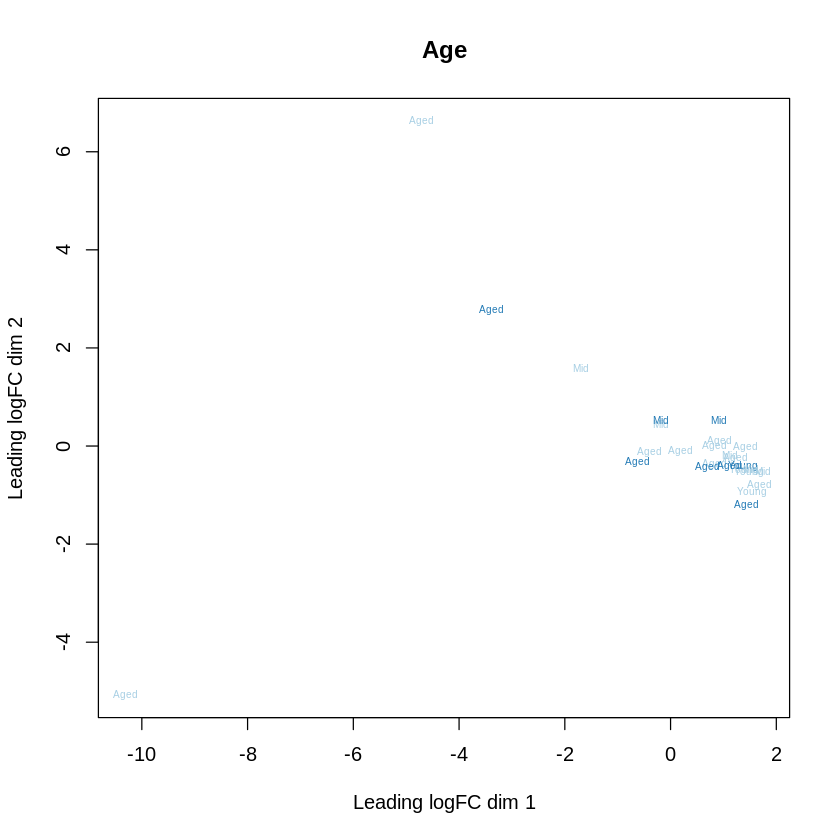

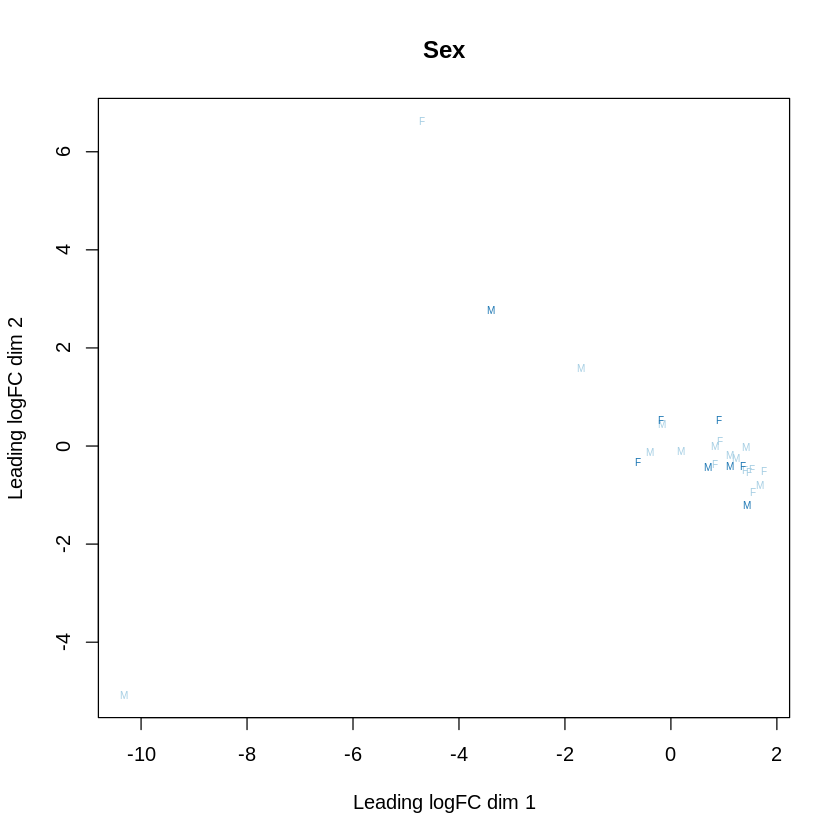

In [70]:
geneCount_coding.AML.MF.PB <- subset(geneCount.AML.MF.PB, row.names(geneCount.AML.MF.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.AML.MF.PB))
rownames(geneCount_coding.AML.MF.PB) <- id_list
x.AML.MF.PB <- DGEList(counts = geneCount_coding.AML.MF.PB, lib.size = colSums(geneCount_coding.AML.MF.PB),
norm.factors = rep(1,ncol(geneCount_coding.AML.MF.PB)), samples = metaCrop.AML.MF.PB,
group = metaCrop.AML.MF.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.AML.MF.PB)
x.AML.MF.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.AML.MF.PB)
lcpm <- cpm(x.AML.MF.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=26
x.AML.MF.PB <- x.AML.MF.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.AML.MF.PB)
x.AML.MF.PB <- calcNormFactors(x.AML.MF.PB, method = "TMM")
x.AML.MF.PB$samples$norm.factors
col.samp.AML.MF.PB <- samp.type.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type)
levels(col.samp.AML.MF.PB) <-  brewer.pal(nlevels(col.samp.AML.MF.PB), "Paired") #if more than 2 conditions
col.samp.AML.MF.PB <- as.character(col.samp.AML.MF.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.AML.MF.PB, col=col.samp.AML.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.AML.MF.PB$samples$group, col=col.samp.AML.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.AML.MF.PB$samples$Age, col=col.samp.ABM.AML.PB, cex=.5)
title(main="Age")
plotMDS(lcpm, labels=x.AML.MF.PB$samples$Sex, col=col.samp.ABM.AML.PB, cex=.5)
title(main="Sex")

### Limma Analysis to identify Differentially Expressed Genes

In [ ]:
samples.tmp <- x.ABM.ET.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.ET.PB <- as.factor(samples.tmp)
design.ABM.ET.PB <- model.matrix(~0 + samples.ABM.ET.PB)
colnames(design.ABM.ET.PB) <- c("AgedBoneMarrowCtrl", "ET")
celltypes.ABM.ET.PB <- as.factor(as.character(x.ABM.ET.PB$sample$CellType))
cm.ABM.ET.PB <- makeContrasts(ET-AgedBoneMarrowCtrl, levels=design.ABM.ET.PB)
v.ABM.ET.PB <- voom(x.ABM.ET.PB, design.ABM.ET.PB, plot=FALSE)
vfit.ABM.ET.PB <- lmFit(v.ABM.ET.PB,design.ABM.ET.PB)
vfit.ABM.ET.PB <- contrasts.fit(vfit.ABM.ET.PB, contrasts=cm.ABM.ET.PB)
efit.ABM.ET.PB <- eBayes(vfit.ABM.ET.PB)
topTable(efit.ABM.ET.PB, coef=1)
dt.ABM.ET.PB <- decideTests(efit.ABM.ET.PB)
summary(dt.ABM.ET.PB)
length(which(dt.ABM.ET.PB!=0))
topTable.ABM.ET.PB <- topTreat(efit.ABM.ET.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.ET.PB, file="LImma_DE_AgedBMvsET_Prog_Holm_Jamieson_RNASeq_TCW.csv")

In [ ]:
samples.tmp <- x.ABM.PV.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.PV.PB <- as.factor(samples.tmp)
design.ABM.PV.PB <- model.matrix(~0 + samples.ABM.PV.PB)
colnames(design.ABM.PV.PB) <- c("AgedBoneMarrowCtrl", "PV")
cm.ABM.PV.PB <- makeContrasts(PV-AgedBoneMarrowCtrl, levels=design.ABM.PV.PB)
v.ABM.PV.PB <- voom(x.ABM.PV.PB, design.ABM.PV.PB, plot=FALSE)
vfit.ABM.PV.PB <- lmFit(v.ABM.PV.PB,design.ABM.PV.PB)
vfit.ABM.PV.PB <- contrasts.fit(vfit.ABM.PV.PB, contrasts=cm.ABM.PV.PB)
efit.ABM.PV.PB <- eBayes(vfit.ABM.PV.PB)
topTable(efit.ABM.PV.PB, coef=1)
dt.ABM.PV.PB <- decideTests(efit.ABM.PV.PB)
summary(dt.ABM.PV.PB)
length(which(dt.ABM.PV.PB!=0))
topTable.ABM.PV.PB <- topTreat(efit.ABM.PV.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.PV.PB, file="Limma_DE_AgedBMvsPV_Prog_Holm_Jamieson_RNASeq_TCW.csv")

In [ ]:
samples.tmp <- x.ABM.MF.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.MF.PB <- as.factor(samples.tmp)
design.ABM.MF.PB <- model.matrix(~0 + samples.ABM.MF.PB)
colnames(design.ABM.MF.PB) <- c("AgedBoneMarrowCtrl", "MF")
cm.ABM.MF.PB <- makeContrasts(MF-AgedBoneMarrowCtrl, levels=design.ABM.MF.PB)
v.ABM.MF.PB <- voom(x.ABM.MF.PB, design.ABM.MF.PB, plot=FALSE)
vfit.ABM.MF.PB <- lmFit(v.ABM.MF.PB,design.ABM.MF.PB)
vfit.ABM.MF.PB <- contrasts.fit(vfit.ABM.MF.PB, contrasts=cm.ABM.MF.PB)
efit.ABM.MF.PB <- eBayes(vfit.ABM.MF.PB)
topTable(efit.ABM.MF.PB, coef=1)
dt.ABM.MF.PB <- decideTests(efit.ABM.MF.PB)
summary(dt.ABM.MF.PB)
length(which(dt.ABM.MF.PB!=0))
topTable.ABM.MF.PB <- topTreat(efit.ABM.MF.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.MF.PB, file="LImma_DE_AgedBMvsMF_Prog_Holm_Jamieson_RNASeq_TCW.csv")

In [ ]:
samples.tmp <- x.ABM.CML.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.CML.PB <- as.factor(samples.tmp)
design.ABM.CML.PB <- model.matrix(~0 + samples.ABM.CML.PB)
colnames(design.ABM.CML.PB) <- c("AgedBoneMarrowCtrl", "CML")
cm.ABM.CML.PB <- makeContrasts(CML-AgedBoneMarrowCtrl, levels=design.ABM.CML.PB)
v.ABM.CML.PB <- voom(x.ABM.CML.PB, design.ABM.CML.PB, plot=FALSE)
vfit.ABM.CML.PB <- lmFit(v.ABM.CML.PB,design.ABM.CML.PB)
vfit.ABM.CML.PB <- contrasts.fit(vfit.ABM.CML.PB, contrasts=cm.ABM.CML.PB)
efit.ABM.CML.PB <- eBayes(vfit.ABM.CML.PB)
topTable(efit.ABM.CML.PB, coef=1)
dt.ABM.CML.PB <- decideTests(efit.ABM.CML.PB)
summary(dt.ABM.CML.PB)

length(which(dt.ABM.CML.PB!=0))
topTable.ABM.CML.PB <- topTreat(efit.ABM.CML.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.CML.PB, file="Limma_DE_AgedBMvsCML_Prog_Holm_Jamieson_RNASeq_TCW.csv")
topTable.ABM.CML.PB[topTable.ABM.CML.PB$ENTREZID %in% c("79058","5546","5371","1050","6688","6929",
                                                        "7709","4193","4221","1025","4211","4066"),]

In [ ]:
samples.tmp <- x.ABM.AML.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.AML.PB <- as.factor(samples.tmp)
design.ABM.AML.PB <- model.matrix(~0 + samples.ABM.AML.PB)
colnames(design.ABM.AML.PB) <- c("AgedBoneMarrowCtrl", "AML")
cm.ABM.AML.PB <- makeContrasts(AML-AgedBoneMarrowCtrl, levels=design.ABM.AML.PB)
v.ABM.AML.PB <- voom(x.ABM.AML.PB, design.ABM.AML.PB, plot=FALSE)
vfit.ABM.AML.PB <- lmFit(v.ABM.AML.PB,design.ABM.AML.PB)
vfit.ABM.AML.PB <- contrasts.fit(vfit.ABM.AML.PB, contrasts=cm.ABM.AML.PB)
efit.ABM.AML.PB <- eBayes(vfit.ABM.AML.PB)
topTable(efit.ABM.AML.PB, coef=1)
dt.ABM.AML.PB <- decideTests(efit.ABM.AML.PB)
summary(dt.ABM.AML.PB)

length(which(dt.ABM.AML.PB != 0))
topTable.ABM.AML.PB <- topTreat(efit.ABM.AML.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.AML.PB, file="Limma_DE_AgedBMvsAML_Prog_Holm_Jamieson_RNASeq_TCW.csv")

In [ ]:
samples.tmp <- x.CML.MF.PB$sample$Sample.type
table(samples.tmp)
samples.CML.MF.PB <- as.factor(samples.tmp)
design.CML.MF.PB <- model.matrix(~0 + samples.CML.MF.PB)
colnames(design.CML.MF.PB) <- c("CML", "MF")
cm.CML.MF.PB <- makeContrasts(CML-MF, levels=design.CML.MF.PB)
v.CML.MF.PB <- voom(x.CML.MF.PB, design.CML.MF.PB, plot=FALSE)
vfit.CML.MF.PB <- lmFit(v.CML.MF.PB,design.CML.MF.PB)
vfit.CML.MF.PB <- contrasts.fit(vfit.CML.MF.PB, contrasts=cm.CML.MF.PB)
efit.CML.MF.PB <- eBayes(vfit.CML.MF.PB)
dt.CML.MF.PB <- decideTests(efit.CML.MF.PB)
topTable.CML.MF.PB <- topTreat(efit.CML.MF.PB, coef=1, n=Inf, sort.by="p")

celltypes.CML.MF.PB <- as.factor(as.character(x.CML.MF.PB$sample$CellType))
design.fct.CML.MF.PB <- model.matrix(~0 + celltypes.CML.MF.PB + samples.CML.MF.PB)
colnames(design.fct.CML.MF.PB) <- c("CellType1","CellType2", "CML - MF")

v.CML.MF.PB <- voom(x.CML.MF.PB, design.fct.CML.MF.PB, plot=FALSE)
vfit.CML.MF.PB <- lmFit(v.CML.MF.PB,design.fct.CML.MF.PB)
efit.CML.MF.PB <- eBayes(vfit.CML.MF.PB)
topTable(efit.CML.MF.PB, coef=3)
dt.CML.MF.PB <- decideTests(efit.CML.MF.PB)
summary(dt.CML.MF.PB)
topTable.fct.CML.MF.PB <- topTreat(efit.CML.MF.PB, coef=3, n=Inf, sort.by="p")
#write.csv(topTable.fct.CML.MF.PB, file="Limma_DE_CMLvsMF_factorCellType_Prog_Holm_Jamieson_RNASeq_TCW.csv")

### Figure 2G
#### Heatmap of AML vs MF DE Genes in Progenitor Cells

samples.tmp
AML  MF 
  4  22 

       CellType1 CellType2 AML - MF
Down           0         0      385
NotSig         1         0     5934
Up          6679      6680      361

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000066056,ENSG00000066056,7075,TIE1,3.093774,5.561894,10.942838,7.453171e-12,4.978718e-08,15.409996
ENSG00000010327,ENSG00000010327,23166,STAB1,-5.260728,3.617063,-10.004924,5.992185e-11,2.001390e-07,14.695289
ENSG00000123146,ENSG00000123146,976,ADGRE5,-2.476463,7.398562,-7.380778,3.744368e-08,8.337459e-05,8.793091
ENSG00000198520,ENSG00000198520,339541,C1orf228,-2.038122,7.821220,-7.079897,8.280770e-08,1.382889e-04,8.033851
ENSG00000132334,ENSG00000132334,5791,PTPRE,-2.187698,4.620074,-6.923180,1.257085e-07,1.472137e-04,7.573230
ENSG00000152556,ENSG00000152556,5213,PFKM,2.823556,5.159219,6.904266,1.322278e-07,1.472137e-04,7.234809
ENSG00000143799,ENSG00000143799,142,PARP1,1.494468,9.042905,6.694543,2.322179e-07,2.160994e-04,7.044060
ENSG00000140678,ENSG00000140678,3687,ITGAX,-3.171265,3.237559,-6.610779,2.911519e-07,2.160994e-04,6.751226
ENSG00000145020,ENSG00000145020,275,AMT,2.189405,5.685951,6.648773,2.627420e-07,2.160994e-04,6.718263


       SexM SexF CellType AML - MF
Down      0    0        0      349
NotSig    1    1     6680     6024
Up     6679 6679        0      307

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000010327,ENSG00000010327,23166,STAB1,-5.534933,3.617063,-10.448400,3.264157e-11,1.090228e-07,15.113162
ENSG00000066056,ENSG00000066056,7075,TIE1,3.063365,5.561894,10.639887,2.160781e-11,1.090228e-07,14.362757
ENSG00000198520,ENSG00000198520,339541,C1orf228,-2.109341,7.821220,-7.372683,4.716628e-08,6.702187e-05,8.580108
ENSG00000123146,ENSG00000123146,976,ADGRE5,-2.517642,7.398562,-7.348646,5.016607e-08,6.702187e-05,8.519363
ENSG00000204839,ENSG00000204839,642475,MROH6,-2.495870,3.392303,-7.363900,4.824060e-08,6.702187e-05,8.256865
ENSG00000132334,ENSG00000132334,5791,PTPRE,-2.289425,4.620074,-7.087973,9.833848e-08,1.094835e-04,7.766113
ENSG00000152556,ENSG00000152556,5213,PFKM,2.798447,5.159219,6.655854,3.052684e-07,2.913133e-04,6.450014
ENSG00000143799,ENSG00000143799,142,PARP1,1.503120,9.042905,6.487131,4.776376e-07,3.278410e-04,6.366393
ENSG00000172932,ENSG00000172932,338692,ANKRD13D,-1.870848,6.313320,-6.474308,4.942237e-07,3.278410e-04,6.330738


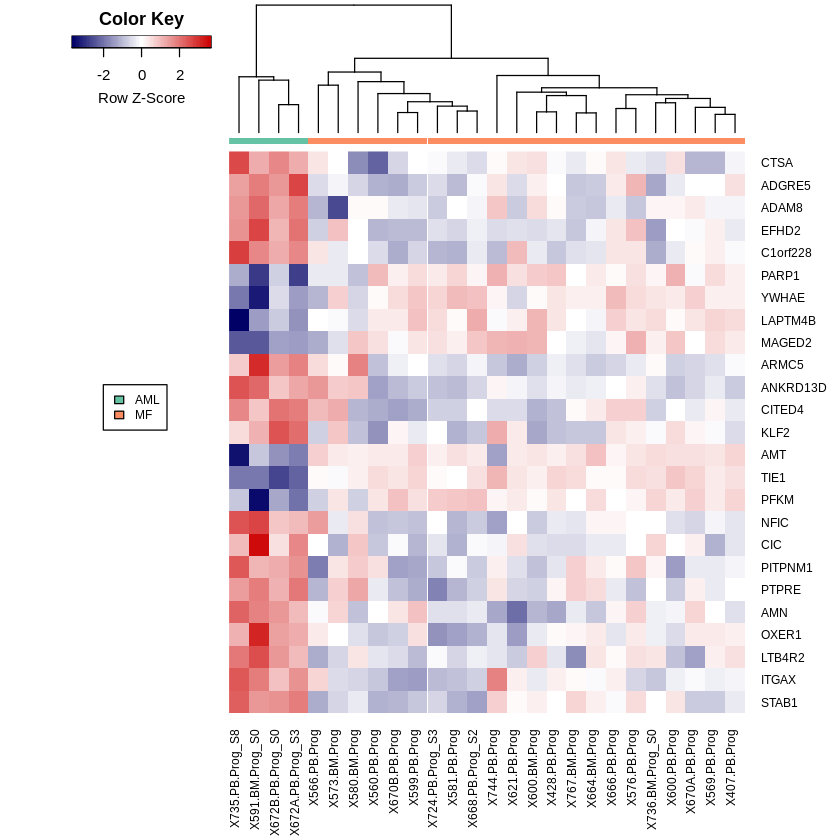

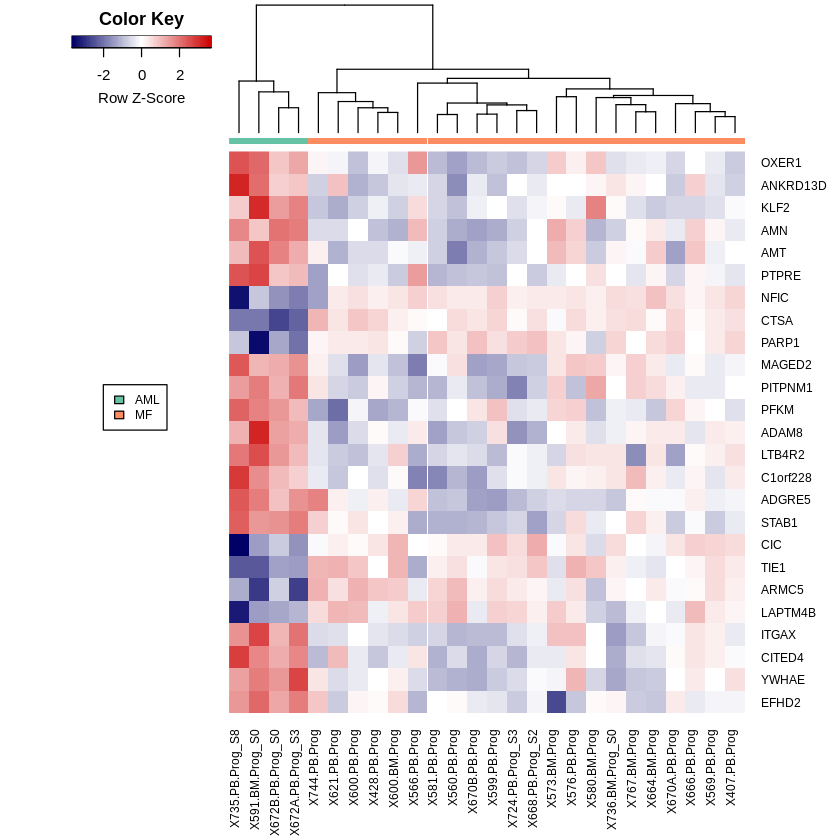

In [81]:
samples.tmp <- x.AML.MF.PB$sample$Sample.type
table(samples.tmp)
samples.AML.MF.PB <- as.factor(samples.tmp)

celltypes.AML.MF.PB <- as.factor(as.character(x.AML.MF.PB$sample$CellType))
sex.AML.MF.PB <- as.factor(as.character(x.AML.MF.PB$sample$Sex))
newdesign.AML.MF.PB <- model.matrix(~0 + sex.AML.MF.PB + 
                                    celltypes.AML.MF.PB + samples.AML.MF.PB)
colnames(newdesign.AML.MF.PB) <- c("SexM", "SexF","CellType", "AML - MF")
design.AML.MF.PB <- model.matrix(~0 + celltypes.AML.MF.PB + samples.AML.MF.PB)
colnames(design.AML.MF.PB) <- c("CellType1","CellType2", "AML - MF")

v.AML.MF.PB <- voom(x.AML.MF.PB, design.AML.MF.PB, plot=FALSE)
vfit.AML.MF.PB <- lmFit(v.AML.MF.PB,design.AML.MF.PB)
efit.AML.MF.PB <- eBayes(vfit.AML.MF.PB)
dt.AML.MF.PB <- decideTests(efit.AML.MF.PB)
summary(dt.AML.MF.PB)
topTable(efit.AML.MF.PB, coef=3)
topTable.AML.MF.PB <- topTreat(efit.AML.MF.PB, coef=3, n=Inf, sort.by="p")
#write.csv(topTable.AML.MF.PB, 
#       file="Limma_DE_AMLvsMF_factorCellType_Prog_Holm_Jamieson_RNASeq_TCW.csv")

topgenes.AML.MF.PB <- row.names(topTable.AML.MF.PB)[1:25]
k.AML.MF.PB <- which(row.names(x.AML.MF.PB$counts) %in% topgenes.AML.MF.PB)
logCPM.AML.MF.PB <- cpm(x.AML.MF.PB, log=TRUE)
group.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type)
col.samp.AML.MF.PB <- samp.type.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type)
levels(col.samp.AML.MF.PB) <-  brewer.pal(8, "Set2") 
col.samp.AML.MF.PB <- as.character(col.samp.AML.MF.PB)

mycol <- colorpanel(100,"#000066","white","#CC0000")
#pdf(file="Holm_Jamieson_AMLvMF_Prog_LimmaFactorCellType_DEGenes_Heatmap.pdf", width=7, height=9)
heatmap.2(logCPM.AML.MF.PB[k.AML.MF.PB,], scale="row",
    labRow=x.AML.MF.PB$genes$SYMBOL[k.AML.MF.PB], labCol=x.AML.MF.PB$samples$Sample,  
col=mycol, trace="none", density.info="none", ColSideColors=col.samp.AML.MF.PB, key=T,
margin=c(8,6), lhei=c(2,10), dendrogram="column")

legend("left", fill = unique(col.samp.AML.MF.PB),
legend = unique(group.AML.MF.PB), inset=c(0,0), cex=.6)
#dev.off()

v.AML.MF.PB.new <- voom(x.AML.MF.PB, newdesign.AML.MF.PB, plot=FALSE)
vfit.AML.MF.PB.new <- lmFit(v.AML.MF.PB.new, newdesign.AML.MF.PB)
efit.AML.MF.PB.new <- eBayes(vfit.AML.MF.PB.new)
dt.AML.MF.PB.new <- decideTests(efit.AML.MF.PB.new)
summary(dt.AML.MF.PB.new)
topTable(efit.AML.MF.PB.new, coef=4)
topTable.AML.MF.PB.new <- topTreat(efit.AML.MF.PB.new, coef=4, n=Inf, sort.by="p")
write.csv(topTable.AML.MF.PB.new, 
       file="Limma_DE_AMLvsMF_factorCellTypeAgeSex_Prog_Holm_Jamieson_RNASeq_TCW.csv")

topgenes.AML.MF.PB.new <- row.names(topTable.AML.MF.PB.new)[1:25]
k.AML.MF.PB.new <- which(row.names(x.AML.MF.PB$counts) %in% topgenes.AML.MF.PB.new)
group.AML.MF.PB.new <- as.factor(x.AML.MF.PB$samples$Sample.type)

mycol <- colorpanel(100,"#000066","white","#CC0000")
#pdf(file="Holm_Jamieson_AMLvMF_Prog_LimmaFactorCellType_DEGenes_Heatmap.pdf", width=7, height=9)
heatmap.2(logCPM.AML.MF.PB[k.AML.MF.PB.new,], scale="row",
    labRow=x.AML.MF.PB$genes$SYMBOL[k.AML.MF.PB], labCol=x.AML.MF.PB$samples$Sample,  
col=mycol, trace="none", density.info="none", ColSideColors=col.samp.AML.MF.PB, key=T,
margin=c(8,6), lhei=c(2,10), dendrogram="column")

legend("left", fill = unique(col.samp.AML.MF.PB),
legend = unique(group.AML.MF.PB.new), inset=c(0,0), cex=.6)
#dev.off()

In [82]:
table(topTable.AML.MF.PB.new$genes[topTable.AML.MF.PB.new$adj.P.Val < 0.05] %in% 
      topTable.AML.MF.PB$genes[topTable.AML.MF.PB$adj.P.Val < 0.05])


FALSE  TRUE 
   29   627 

## Figure 2B
### Venn Diagram of Differentially Expressed Genes Across Comparisons in Progenitor Cells

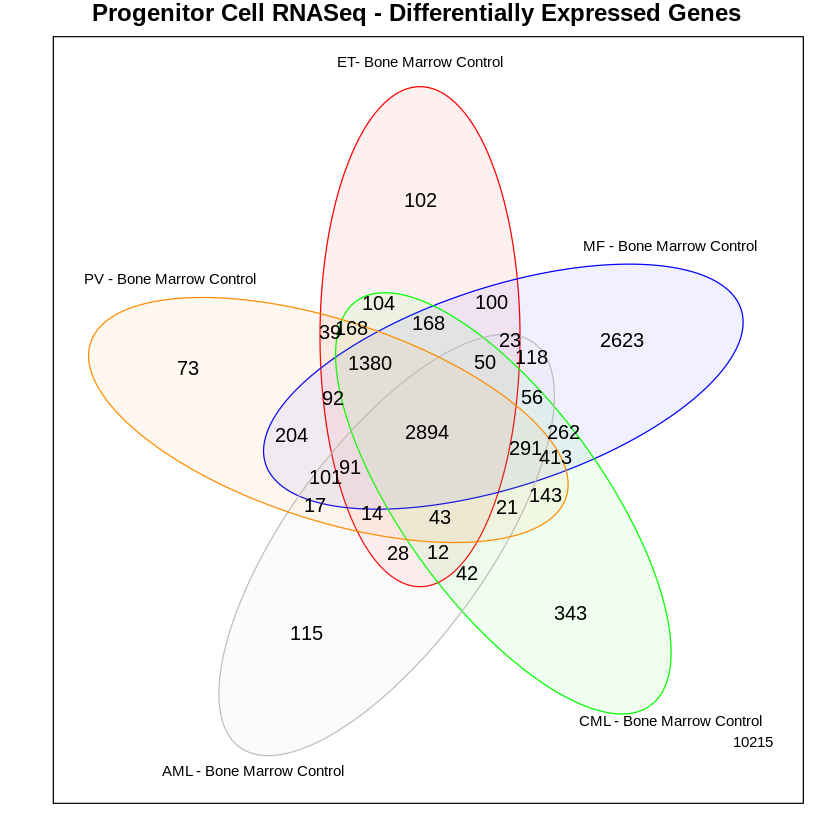

In [36]:
vennInput_withAML <- matrix(nrow = nrow(geneCount_coding.ABM.MF.PB), ncol=5, data = 0)
rownames(vennInput_withAML) <- rownames(geneCount_coding.ABM.MF.PB)

vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.PB)),1] <- dt.ABM.PV.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.PB))], 
                                            rownames(dt.ABM.PV.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.PB)),2] <- dt.ABM.ET.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.PB))],
                                            rownames(dt.ABM.ET.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.PB)),3] <- dt.ABM.MF.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.PB))], 
                                            rownames(dt.ABM.MF.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.PB)),4] <- dt.ABM.CML.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.PB))], 
                                            rownames(dt.ABM.CML.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.PB)),5] <- dt.ABM.AML.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.PB))], 
                                            rownames(dt.ABM.AML.PB)),1]

colnames(vennInput_withAML) <- c("PV - Bone Marrow Control",
                         "ET- Bone Marrow Control",
                         "MF - Bone Marrow Control",
                         "CML - Bone Marrow Control",
                        "AML - Bone Marrow Control"
                        )

#pdf("vennDiagram_AgedBMvsPV_ET_MF_CML_AML_Prog_Holm_Jamieson_TCW.pdf", width=7, height=7)
vennDiagram(vennInput_withAML,circle.col=c('red','blue','green', 'gray', "dark orange"), cex=0.75,
           show.include = FALSE, main="Progenitor Cell RNASeq - Differentially Expressed Genes ")
#
#dev.off()

## Identification of Genes in Differentially Expressed in Only One Comparison

In [110]:

ABMvETonlygenes_withAML<- which(abs(vennInput_withAML[,2]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvETonlygenes_withAML)
ABMvETonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.ET.PB[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.PB$genes), "logFC"],
                         adj.P.Val=topTable.ABM.ET.PB[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.PB$genes), "adj.P.Val"])
topTable.ABM.ET.uniqProg <- topTable.ABM.ET.PB[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.PB$genes),]
#write.csv(ABMvETonly_withAML, file="RNAseq_DEgenes_only_ABMvET_Prog_withAML.csv")

ABMvPVonlygenes_withAML <- which(abs(vennInput_withAML[,1]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvPVonlygenes_withAML)
ABMvPVonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.PV.PB[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.PB$genes), "logFC"],
                         adj.P.Val=topTable.ABM.PV.PB[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.PB$genes), "adj.P.Val"])
topTable.ABM.PV.uniqProg <- topTable.ABM.PV.PB[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.PB$genes),]
#write.csv(ABMvPVonly_withAML, file="RNAseq_DEgenes_only_ABMvPV_Prog_withAML.csv")

ABMvMFonlygenes_withAML <- which(abs(vennInput_withAML[,3]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvMFonlygenes_withAML)
ABMvMFonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.MF.PB[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.PB$genes), "logFC"],
                         adj.P.Val=topTable.ABM.MF.PB[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.PB$genes), "adj.P.Val"])
topTable.ABM.MF.uniqProg <- topTable.ABM.MF.PB[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.PB$genes),]
#write.csv(ABMvMFonly_withAML, file="RNAseq_DEgenes_only_ABMvMF_Prog_withAML.csv")

ABMvCMLonlygenes_withAML <- which(abs(vennInput_withAML[,4]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvCMLonlygenes_withAML)
ABMvCMLonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.CML.PB[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.PB$genes), "logFC"],
                         adj.P.Val=topTable.ABM.CML.PB[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.PB$genes), "adj.P.Val"])
topTable.ABM.CML.uniqProg <- topTable.ABM.CML.PB[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.PB$genes),]
#write.csv(ABMvCMLonly_withAML, file="RNAseq_DEgenes_only_ABMvCML_Prog_withAML.csv")

ABMvAMLonlygenes_withAML <- which(abs(vennInput_withAML[,5]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvAMLonlygenes_withAML)
ABMvAMLonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.AML.PB[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.PB$genes), "logFC"],
                         adj.P.Val=topTable.ABM.AML.PB[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.PB$genes), "adj.P.Val"])
topTable.ABM.AML.uniqProg <- topTable.ABM.AML.PB[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.PB$genes),]
#write.csv(ABMvAMLonly_withAML, file="RNAseq_DEgenes_only_ABMvAML_Prog_withAML.csv")

[1] 102

[1] 73

[1] 2623

[1] 343

[1] 115

In [65]:
AllComps_withAML <- rownames(vennInput_withAML)[which(rowSums(abs(vennInput_withAML)) == 5)]
AllComps.anno <- data.frame(ENS=AllComps_withAML,ID=pcgenes[match(AllComps_withAML, pcgenes$ENSEMBL),c("ENTREZID", "SYMBOL")])
#write.table(AllComps.anno, file="DEGenes_Prog_AllNormalComparisons.txt", sep="\t", row.names=FALSE, quote=FALSE)
dim(AllComps.anno)

AllComps.anno.df <- cbind(AllComps.anno,
    ABMvPV=topTable.ABM.PV.PB[match(AllComps_withAML,rownames(topTable.ABM.PV.PB)),c("logFC", "adj.P.Val")],
      ABMvET=topTable.ABM.ET.PB[match(AllComps_withAML,rownames(topTable.ABM.ET.PB)),c("logFC", "adj.P.Val")],
      ABMvMF=topTable.ABM.MF.PB[match(AllComps_withAML,rownames(topTable.ABM.MF.PB)),c("logFC", "adj.P.Val")],
      ABMvCML=topTable.ABM.CML.PB[match(AllComps_withAML,rownames(topTable.ABM.CML.PB)),c("logFC", "adj.P.Val")],
      ABMvAML=topTable.ABM.AML.PB[match(AllComps_withAML,rownames(topTable.ABM.AML.PB)),c("logFC", "adj.P.Val")])
head(AllComps.anno.df)
write.table(AllComps.anno.df, file="DEGenes_Prog_AllNormalComparisons_withLogFCadjPval.txt", sep="\t", row.names=FALSE, quote=FALSE)


[1] 2894    3

,ENS,ID.ENTREZID,ID.SYMBOL,ABMvPV.logFC,ABMvPV.adj.P.Val,ABMvET.logFC,ABMvET.adj.P.Val,ABMvMF.logFC,ABMvMF.adj.P.Val,ABMvCML.logFC,ABMvCML.adj.P.Val,ABMvAML.logFC,ABMvAML.adj.P.Val
8,ENSG00000001036,2519,FUCA2,3.1793782,6.848945e-10,2.832940,7.495681e-07,2.848983,2.480782e-09,3.2841961,1.885696e-10,2.660569,7.443113e-06
13,ENSG00000001497,81887,LAS1L,-1.1702956,1.032454e-04,-1.041178,1.974686e-03,-1.245995,4.829758e-04,-0.7220338,7.538217e-04,-1.133555,7.656546e-04
17,ENSG00000001629,54467,ANKIB1,-1.7408230,3.285244e-05,-1.439405,2.844475e-03,-1.743789,2.377356e-09,-1.3467625,3.190546e-05,-1.751658,9.046770e-04
23,ENSG00000002549,51056,LAP3,-1.3650206,4.229464e-05,-1.064357,9.205910e-03,-1.517278,1.181994e-10,-1.4583260,3.705939e-05,-2.428698,8.252144e-05
24,ENSG00000002586,4267,CD99,2.1290162,2.415945e-06,2.428007,2.003288e-04,1.914956,1.536079e-06,1.7850042,2.672084e-04,3.505448,9.024607e-07
33,ENSG00000003056,4074,M6PR,-0.9352218,4.009833e-04,-1.191554,1.219862e-02,-1.154685,2.688862e-07,-0.8358528,6.554487e-03,-1.352561,1.464838e-03


## Functional Enrichment, Pathway Enrichment Analyses

In [42]:
load("../msigdb/human_c2_v5p2.rdata")
load("../msigdb/human_c4_v5p2.rdata")
load("../msigdb/human_c5_v5p2.rdata")
load("../msigdb/human_c6_v5p2.rdata")
load("../msigdb/human_H_v5p2.rdata")
library(SPIA)
library(WebGestaltR)
library(pathview)
library(GSVA)
library(GSEABase)
library(GSVAdata)
library(Biobase)
library(genefilter)
data(c2BroadSets)


comps <- list(c("ABM", "ET", 0), c("ABM","PV", 0), c("ABM","MF", 0), c("ABM","CML", 0), c("ABM", "AML", 0))

In [69]:

prep.spia.webgest <- function(comps, z, adjPval=0.05, refgenelist=NULL) {
    if(z == "") {
        tmp <- paste(comps[1], comps[2], sep= ".")
    } else {
        tmp <- paste(comps[1], comps[2], z, sep=".")
    }
    topTab <- get(paste("topTable", comps[1], comps[2], z, sep="."))
    topTab$ENTREZ <- unlist(as.list(topTab$ENTREZID))
    topTab <-topTab[!is.na(topTab$ENTREZ),]
    topTab <-topTab[!duplicated(topTab$ENTREZ),]
    tg1 <- topTab[topTab$adj.P.Val < adjPval,]
    DE_genes_spia = tg1$logFC
    DE_genes_webg = tg1$ENTREZ
    names(DE_genes_spia) <- as.vector(tg1$ENTREZ)
    if(is.null(refgenelist)) {
        ALL_genes = topTab$ENTREZ
    } else {
        ALL_genes = refgenelist[!is.na(refgenelist)]
    }
    write.table(DE_genes_webg, sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s_%s.txt", comps[1], comps[2], z), 
                sep="\t", row.names=F, col.names=F)
    write.table(ALL_genes, sprintf("DE_ReferenceGenes_%sv%s_%s.txt", comps[1], comps[2], z), 
                sep="\t",row.names=F, col.names=F)
    list(DE_genes_spia, ALL_genes)

}


do.webgestalt <- function(comps, z, org, addGeneSets=c()) {
    if (z == "") {
        interestGeneFile <- sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s.txt", comps[1], comps[2])
        referenceGeneFile <- sprintf("DE_ReferenceGenes_%sv%s.txt", comps[1], comps[2])
    } else {
        interestGeneFile <- sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s_%s.txt", comps[1], comps[2], z)
        referenceGeneFile <- sprintf("DE_ReferenceGenes_%sv%s_%s.txt", comps[1], comps[2], z)
    }
    outputDirectory <- getwd()
    #for (database in listGeneSet(org)){
    for (database in c("geneontology_Biological_Process","geneontology_Molecular_Function","geneontology_Biological_Process_noRedundant",
                        "pathway_KEGG","pathway_Panther","pathway_Reactome","pathway_Wikipathway","network_Kinase_target",
                        "network_miRNA_target","network_PPI_BIOGRID","network_Transcription_Factor_target",
                        "disease_Disgenet", "disease_OMIM", "drug_DrugBank", "phenotype_Human_Phenotype_Ontology", 
                        addGeneSets)){
        enrichResult <- WebGestaltR(enrichMethod="ORA", organism=org, 
                                    enrichDatabase=database,interestGeneFile=interestGeneFile, 
                                    interestGeneType="entrezgene",referenceGeneFile=referenceGeneFile, 
                                    referenceGeneType="entrezgene",is.output=TRUE,
                                    outputDirectory=outputDirectory,
                                    projectName=sprintf("%sv%s_%s_%s", comps[1], comps[2], z, database))
    }
    enrichResult
}
    
do.gsea <- function(comps, z="S", cm=NULL, adjPvalueCutoff=0.2, 
                    runssGSEA=TRUE, plotHeatmap=TRUE) {
    
    canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]
    gene_exp <- get(paste("x", comps[1], comps[2], z, sep="."))$counts
    gene_ids <- get(paste("x", comps[1], comps[2], z, sep="."))$genes
    row.names(gene_exp) <- gene_ids$ENTREZID
    design <- get(paste("design", comps[1], comps[2], z, sep="."))

    gsva_exp <- gsva(gene_exp, canonicalC2BroadSets, mx.diff=TRUE, verbose=TRUE, parallel.sz=1,min.sz=5, max.sz=500)
    fit <- lmFit(gsva_exp$es.obs, design)
    if (!is.null(cm)) {
        fit2 <- contrasts.fit(fit, cm)
        fit2 <- eBayes(fit2)
        coef.int <- 1
    } else {
        fit2 <- eBayes(fit)
        coef.int <- as.numeric(comps[3])
    }
    logFCcutoff <- log2(2)
    allGeneSets <- topTable(fit2, coef=coef.int, number=Inf)
    DEgeneSets <- topTable(fit2, coef=coef.int, number=Inf,p.value=adjPvalueCutoff, adjust="BH")
    
    res <- decideTests(fit2, p.value=adjPvalueCutoff)
    message(sprintf("GSEA: Number of significant categories at FDR < %s:", adjPvalueCutoff))
    message(nrow(DEgeneSets[DEgeneSets$adj.P.Val < adjPvalueCutoff,]))
    write.csv(DEgeneSets, sprintf("GSEA_%sv%s_%s_LimmaOutput.csv", comps[1], comps[2], z))
    
    if(nrow(DEgeneSets) > 1 & plotHeatmap) {
        sig <- DEgeneSets[1:25,]
        #subset(DEgeneSets, adj.P.Val<0.99) #change this back
        all <- row.names(DEgeneSets)

        #heatmap
        pdf(sprintf("GSEA_%sv%s_%s_LimmaOutput_Heatmap.pdf", comps[1], comps[2], z), width=7, height=8)
        par(xpd=TRUE)
        require(gplots)
        #library(RColorBrewer)
        coul = colorRampPalette(rev(brewer.pal(8, "RdBu")))(25)
        gsva.sig <- subset(gsva_exp$es.obs, rownames(gsva_exp$es.obs) %in% row.names(sig))

        my_group=as.factor(get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type)
        my_col=brewer.pal(5, "Set2")[my_group]
        
        heatmap.2(gsva.sig, scale="row", col = coul, cexRow=.5, 
                  labCol=get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type,
          ColSideColors=my_col, key=T, trace="none", margins=c(5,10))
        legend("topright", fill = unique(my_col), legend = unique(my_group), inset=c(-.05,0))
        dev.off()
    } else {
        message("No heatmap made for GSEA analysis!")
    }
    
    if(runssGSEA) {
        do.ssgsea(comps, z, gene_exp, design, cm, adjPvalueCutoff, plotHeatmap)
    #    gsva_exp.ss <- gsva(gene_exp, c2BroadSets, mx.diff=TRUE, method="ssgsea", verbose=TRUE, 
    #                parallel.sz=1,min.sz=5, max.sz=500)
    #    fit.ss <- lmFit(gsva_exp.ss, design_rep)
    #    if (!is.null(cm)) {
    #        fit2.ss <- contrasts.fit(fit.ss, cm)
    #    }
    #    fit2.ss <- eBayes(fit.ss)
    #    ## set1 is differentially expressed
    #    #topTable(fit2.ss, coef=2)
    #    logFCcutoff <- log2(2)
    #    allGeneSets.ss <- topTable(fit2.ss, coef=2, number=Inf)
    #    DEgeneSets.ss <- topTable(fit2.ss, coef=2, number=Inf,p.value=adjPvalueCutoff, adjust="BH")
    #    res.ss <- decideTests(fit2.ss, p.value=adjPvalueCutoff)
    #    summary(res.ss)
    #
    #    write.csv(DEgeneSets.ss, sprintf("ssGSEA_%sv%s_LimmaOutput.csv", comps[1], comps[2]))
    }
        
}

do.ssgsea  <- function(comps, z="S", gene_exp.ss=NULL, design.ss=NULL, 
                       cm=NULL, adjPvalueCutoff=0.2, plotHeatmap=TRUE) {
    if(is.null(gene_exp.ss)) {
        gene_exp.ss <- get(paste("x", comps[1], comps[2], z, sep="."))
    }
    
    if(is.null(design.ss)) {
        design.ss <- get(paste("design", comps[1], comps[2], z, sep="."))
    }
    
    gsva_exp.ss <- gsva(gene_exp.ss, canonicalC2BroadSets, mx.diff=TRUE, method="ssgsea", verbose=TRUE, 
                    parallel.sz=1,min.sz=5, max.sz=500)
    ## fit the same linear model now to the GSVA enrichment scores
    fit.ss <- lmFit(gsva_exp.ss, design.ss)

    if (is.null(cm)) {
        fit2.ss <- eBayes(fit.ss)
        coef.int.ss <- as.numeric(comps[3])
    } else {
        fit2.ss <- contrasts.fit(fit.ss, cm)
        fit2.ss <- eBayes(fit2.ss)
        coef.int.ss <- 1
    }
    

    logFCcutoff <- log2(2)
    allGeneSets.ss <- topTable(fit2.ss, coef=coef.int.ss, number=Inf)
    DEgeneSets.ss <- topTable(fit2.ss, coef=coef.int.ss, number=Inf, 
                             p.value=adjPvalueCutoff, adjust="BH")
    message(sprintf("ssGSEA: Number of significant categories at FDR < %s:", adjPvalueCutoff))
    message(nrow(DEgeneSets.ss[DEgeneSets.ss$adj.P.Val < adjPvalueCutoff,]))

    res.ss <- decideTests(fit2.ss, p.value=adjPvalueCutoff)
    #summary(res.ss)
    write.csv(DEgeneSets.ss, sprintf("ssGSEA_%sv%s_%s_LimmaOutput.csv", comps[1], comps[2], z))
    
    if(nrow(DEgeneSets.ss) > 1 & plotHeatmap) {
        sig.ss <- DEgeneSets.ss[1:25,]
        #subset(DEgeneSets, adj.P.Val<0.99) #change this back
        all.ss <- row.names(DEgeneSets.ss)

        #heatmap
        pdf(sprintf("ssGSEA_%sv%s_%s_LimmaOutput_Heatmap.pdf", comps[1], comps[2], z), width=7, height=8)
        par(xpd=TRUE)
        require(gplots)
        #library(RColorBrewer)
        coul = colorRampPalette(rev(brewer.pal(8, "RdBu")))(25)
        gsva.sig.ss <- subset(gsva_exp.ss, rownames(gsva_exp.ss) %in% row.names(sig.ss))

        my_group=as.factor(get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type)
        my_col=brewer.pal(5, "Set2")[my_group]
    
        heatmap.2(gsva.sig.ss, scale="row", col = coul, cexRow=.5, 
                  labCol=get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type,
          ColSideColors=my_col, key=T, trace="none", margins=c(5,10))
        legend("topright", fill = unique(my_col), legend = unique(my_group), inset=c(-.05,0))
        dev.off()

    } else {
        message("No heatmap made for ssGSEA analysis!")
    }

    
}



In [67]:

run.enrichment.algs <- function(x, z="S", 
                               camera.sets=c("Hs.c2", "Hs.c4", "Hs.c6"),
                               webGest.sets=c(), fcdir=TRUE, refgenelist=NULL,
                               run.go=TRUE, 
                               run.kegg=TRUE, run.camera=TRUE, 
                               run.spia=FALSE, run.webgest=TRUE, 
                               run.gsea=TRUE, run.ssgsea=TRUE) {
    
    message(sprintf("Comparison: %s vs %s in type %s", x[1], x[2], z))                            
    output_list <- list(summary=list(), output=list())
    tmp <- paste(x[1], x[2], z, sep=".")
    dge <- paste("x",tmp, sep=".")
    design <- paste("design", tmp, sep=".")
    fit <- paste("efit", tmp, sep=".")
    de <- paste("topTable", tmp, sep=".")
    
    if(run.go) {
        if(fcdir) {
            go.res <- goana(get(fit), geneid="ENTREZID", species="Hs")
            go.out <- topGO(go.res, n=Inf)
            go.out$adjP.Up <- p.adjust(topGO(go.res, n=Inf)$P.Up, method = "BH")
            go.out$adjP.Down <- p.adjust(topGO(go.res, n=Inf)$P.Down, method = "BH")
            output_list[["summary"]][["GoAna"]] <-  c(Up=sum(go.out$adjP.Up < 0.05),
                                                       Down=sum(go.out$adjP.Down < 0.05))
        } else {
            if(is.data.frame(get(paste("topTable", tmp, sep=".")))) {
                out <- EG2SYM[match(get(paste("topTable", tmp, sep="."))$ENTREZID,
                                    EG2SYM$gene_id,), "gene_id"]
                out <- out[!is.na(out)]
            } else {
                stop(paste0(paste("topTable", tmp, sep="."), " is not a data frame!"))
            }
            go.res <- goana(out, geneid="ENTREZID", species="Hs")
            go.out <- topGO(go.res, n=Inf)
            go.out$adjP.DE <- p.adjust(topGO(go.res, n=Inf)$P.DE, method = "BH")
            output_list[["summary"]][["GoAna"]] <-  c(DE=sum(go.out$adjP.DE < 0.05))
        }
        output_list[["output"]][["GoAna"]] <- go.out
    }
    if(run.kegg) {
        if(fcdir) {
            kegg.res <- kegga(get(fit), geneid="ENTREZID", species="Hs")
            kegg.out <- topKEGG(kegg.res, n=Inf)
            kegg.out$adjP.Up <- p.adjust(topKEGG(kegg.res, n=Inf)$P.Up, method = "BH")
            kegg.out$adjP.Down <- p.adjust(topKEGG(kegg.res, n=Inf)$P.Down, method = "BH")
            output_list[["summary"]][["KeggAna"]] <- c(Up=sum(kegg.out$adjP.Up < 0.05),
                                                   Down=sum(kegg.out$adjP.Down < 0.05))
        } else {
            if(is.data.frame(get(paste("topTable", tmp, sep=".")))) {
                out <- EG2SYM[match(get(paste("topTable", tmp, sep="."))$ENTREZID,
                                    EG2SYM$gene_id,), "gene_id"]
                out <- out[!is.na(out)]
            } else {
                stop(paste0(paste("topTable", tmp, sep="."), " is not a data frame!"))
            }
            kegg.res <- kegga(out, geneid="ENTREZID", species="Hs")
            kegg.out <- topKEGG(kegg.res, n=Inf)
            kegg.out$adjP.DE <- p.adjust(topKEGG(kegg.res, n=Inf)$P.DE, method = "BH")
            output_list[["summary"]][["KeggAna"]] <-  c(DE=sum(kegg.out$adjP.DE < 0.05)) 
        }
        output_list[["output"]][["KeggAna"]] <- kegg.out
    }

    if(run.camera) {
        logCPM <- cpm(get(dge), log=TRUE)
        if(x[3] == 0) {
            cam.res <- lapply(camera.sets, function(y) {
                if(class(get(y)) != "list") {
                    f <- paste0("human_", strsplit(y, split="\\.")[[1]][2], "_v5p2.rdata")
                    load(f)
                }
                idx <- ids2indices(get(y), id=get(dge)$genes$ENTREZID)
                camera <- camera(logCPM, idx, get(design),
                                 contrast=get(paste("cm", tmp,sep=".")))
            })
        } else {
            cam.res <- lapply(camera.sets, function(y) {
                if(class(get(y)) != "list") {
                    f <- paste0("human_", strsplit(y, split="\\.")[[1]][2], "_v5p2.rdata")
                    load(f)
                }
                idx <- ids2indices(get(y), id=get(dge)$genes$ENTREZID)
                camera <- camera(logCPM, idx, get(design), contrast=as.numeric(x[3]))
            })
        }
        output_list[["output"]][["Camera"]] <- cam.res
        output_list[["summary"]][["Camera"]] <- unlist(lapply(1:length(camera.sets), function(i) {
            sum(cam.res[[i]]$FDR < 0.05)
        }))
    }
    
    if(run.spia | run.webgest) {
        
        spia.webges.inp <- prep.spia.webgest(x, z, adjPval = 0.05, refgenelist)
        if (run.spia) {
            spia.res <- spia(de=spia.webges.inp[[1]],all=spia.webges.inp[[2]],organism="hsa",
                  nB=2000,plots=FALSE,beta=NULL,combine="fisher",verbose=FALSE)
            output_list[["output"]][["SPIA"]] <- spia.res
            output_list[["summary"]][["SPIA"]] <- sum(spia.res$pGFdr < 0.05)
        } 
        if (run.webgest) {
            webgest.res <- do.webgestalt(x, z=z, org="hsapiens", addGeneSets=webGest.sets)
            output_list[["output"]][["WebGestalt"]] <- webgest.res
            output_list[["summary"]][["WebGestalt"]] <- unlist(lapply(webgest.res,nrow))
        }
    }
    
    if(run.gsea | run.ssgsea) {
        if(x[3]==0) {
            gsea.res <- do.gsea(x, z, cm=get(paste("cm", tmp,sep=".")), adjPvalueCutoff=0.2, 
                                runssGSEA=run.ssgsea, plotHeatmap=TRUE)
            if(run.ssgsea) {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            } else {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            }
        } else {
            gsea.res <- do.gsea(x, z, cm=NULL, 
                                adjPvalueCutoff=0.2, 
                                runssGSEA=run.ssgsea, plotHeatmap=TRUE)
            if(run.ssgsea) {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            } else {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            }
        }
        output_list[["output"]][["GSEA"]] <- gsea.res
    }
    
    return(output_list)
}

In [70]:
spia_enrichment_alg_output <- lapply(1:length(comps), function(x, z="uniqProg") {
    run.enrichment.algs(comps[[x]], z, webGest.sets="network_TCGA_RNASeq_LAML", 
                        refgenelist=get(paste("topTable", comps[[x]][1], comps[[x]][2], "PB", sep="."))$ENTREZID, 
                       run.spia=TRUE, run.webgest=FALSE, run.gsea=FALSE, run.ssgsea=FALSE,
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE)
})

Comparison: ABM vs ET in type uniqProg
Comparison: ABM vs PV in type uniqProg
Comparison: ABM vs MF in type uniqProg
Comparison: ABM vs CML in type uniqProg
Comparison: ABM vs AML in type uniqProg


In [71]:
lapply(spia_enrichment_alg_output, function(x) {
    message(x$summary$SPIA)
    head(x$output$SPIA)
    })

0
0
1
0
0


Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
Asthma,05310,13,1,0.1348807,-1.702842,0.003,0.003565912,0.1378307,0.2852730,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05310+959
Autoimmune thyroid disease,05320,15,1,0.1539667,-1.702842,0.004,0.005168651,0.1378307,0.4134921,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05320+959
Allograft rejection,05330,15,1,0.1539667,-1.702842,0.004,0.005168651,0.1378307,0.4134921,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05330+959
Pathogenic Escherichia coli infection,05130,40,2,0.0722103,7.416686,0.026,0.013663895,0.2290712,1.0000000,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa05130+51807+81027
Systemic lupus erythematosus,05322,39,1,0.3529182,-1.702842,0.006,0.015156103,0.2290712,1.0000000,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05322+959
Intestinal immune network for IgA production,04672,16,1,0.1633528,-1.702842,0.015,0.017180340,0.2290712,1.0000000,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04672+959
Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
Regulation of actin cytoskeleton,04810,107,4,0.01183994,7.6461575,0.048,0.004815256,0.2696543,0.2696543,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa04810+10109+3071+3683+2260
Pathways in cancer,05200,159,2,0.38165293,8.6738391,0.013,0.031287390,0.6227657,1.0000000,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa05200+2260+6772
Transcriptional misregulation in cancer,05202,85,3,0.03336245,0.0000000,NA,0.033362450,0.6227657,1.0000000,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05202+7403+8091+3248


In [75]:
ABMvAML_spia_alg_output <- lapply(comps[5], function(x, z="uniqProg") {
    run.enrichment.algs(x, z, webGest.sets="network_TCGA_RNASeq_LAML",
                        refgenelist=topTable.ABM.AML.PB$ENTREZID,
                       run.webgest=FALSE, run.spia=TRUE, 
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE,
                       run.gsea=FALSE, run.ssgsea=FALSE)
})
lapply(ABMvAML_spia_alg_output[["summary"]], function(y) head(y))
lapply(ABMvAML_spia_alg_output[["output"]][c(1,2,4)], function(y) head(y))

Comparison: ABM vs AML in type uniqProg


list()

list()

In [78]:
AMLvMF_spia_alg_output <- lapply(list(c("AML", "MF", 3)), function(x, z="PB") {
    run.enrichment.algs(x, z, webGest.sets="network_TCGA_RNASeq_LAML",
                        refgenelist=topTable.AML.MF.PB$ENTREZID,
                       run.webgest=FALSE, run.spia=TRUE, 
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE,
                       run.gsea=FALSE, run.ssgsea=FALSE)
})
lapply(AMLvMF_spia_alg_output[["summary"]], function(y) head(y))
lapply(AMLvMF_spia_alg_output[["output"]][c(1,2,4)], function(y) head(y))


Comparison: AML vs MF in type PB


list()

list()

## Analyze Expression of Spliceosome Genes

In [44]:
canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]

Splicing_c2_paths <- Hs.c2[grep("SPLIC", names(Hs.c2))]
Splicing_c5_paths <- Hs.c5[grep("SPLIC", names(Hs.c5))]
Splicing2_c2_paths <- as.list(canonicalC2BroadSets)[grep("SPLIC", names(canonicalC2BroadSets))]
Cytokine_path <- canonicalC2BroadSets[grep("KEGG_CYTOKINE_CYTO", names(canonicalC2BroadSets))]

In [45]:
catlist <- list(canonC2=geneIds(Splicing2_c2_paths), C5=Splicing_c5_paths)
splicingCat.DEoverlap.Prog <- do.call(cbind, lapply(1:ncol(vennInput_withAML), function(x) {
    unlist(lapply(catlist, function(y) {
        unlist(lapply(y, function(z) {
            sig_genes <- row.names(vennInput_withAML[vennInput_withAML[,x] != 0,])
            sig_genes2 <- ENS2EG[match(sig_genes, ENS2EG$ensembl_id), "gene_id"]
            #message(length(sig_genes))
            over <- sig_genes2[sig_genes2 %in% z]
            s <- as.numeric(sum(sig_genes2 %in% z))
            #message(s)
            u <- nrow(vennInput_withAML) - length(z)
            if (s > 5) {
                phyper(s, length(z), u, length(sig_genes2), lower.tail=FALSE)
            } else {
                0.5
            }
        }))
    }))
}))
    
colnames(splicingCat.DEoverlap.Prog)  <- colnames(vennInput_withAML)
apply(vennInput_withAML, 2, table)
splicingCat.DEoverlap.Prog.padj <- apply(splicingCat.DEoverlap.Prog, 2, function(x) p.adjust(x, method="BH"))
splicingCat.DEoverlap.Prog.padj

splicingCat.DEoverlapGenes.Prog <- lapply(1:ncol(vennInput_withAML), function(x) {
    lapply(catlist, function(y) {
        lapply(y, function(z) {
            sig_genes <- row.names(vennInput_withAML[vennInput_withAML[,x] != 0,])
            sig_genes2 <- ENS2EG[match(sig_genes, ENS2EG$ensembl_id), "gene_id"]
            #message(length(sig_genes))
            over <- sig_genes2[sig_genes2 %in% z]
            s <- sum(sig_genes2 %in% z)
            #message(s)
            u <- nrow(vennInput_withAML) - length(z)
            list(s, over)
        })
    })
})
   
sumoutput <- do.call(cbind, lapply(splicingCat.DEoverlapGenes.Prog, function(x) {
    unlist(lapply(x, function(y) unlist(lapply(y, function(z)  z[[1]]))))}))
colnames(sumoutput) <- colnames(vennInput_withAML)
sumoutput

,PV - Bone Marrow Control,ET- Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
-1,2895,2302,4444,3011,1959
0,14361,15037,11479,13955,16429
1,3089,3006,4422,3379,1957


,PV - Bone Marrow Control,ET- Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
canonC2.KEGG_SPLICEOSOME,6.157952e-21,5.957999e-18,2.936626e-19,4.766513e-21,4.568218e-27
canonC2.REACTOME_MRNA_SPLICING,5.077543e-24,2.107807e-15,7.017711e-20,4.602908e-21,2.217921e-32
canonC2.REACTOME_MRNA_SPLICING_MINOR_PATHWAY,1.331585e-06,1.095767e-04,3.976106e-07,3.094605e-07,5.570944e-10
C5.GO_MRNA_SPLICE_SITE_SELECTION,8.360760e-06,8.564680e-04,7.683773e-04,4.249488e-06,1.164277e-04
C5.GO_POSITIVE_REGULATION_OF_RNA_SPLICING,4.304978e-04,1.841041e-03,4.684448e-03,9.339260e-04,1.163563e-05
C5.GO_ALTERNATIVE_MRNA_SPLICING_VIA_SPLICEOSOME,4.198603e-03,1.970947e-03,1.298955e-02,8.970922e-05,1.669477e-03
C5.GO_NEGATIVE_REGULATION_OF_RNA_SPLICING,6.192434e-08,5.025721e-06,1.178610e-05,1.494599e-06,2.925335e-07
C5.GO_POSITIVE_REGULATION_OF_MRNA_SPLICING_VIA_SPLICEOSOME,7.741879e-03,1.437021e-02,3.486734e-02,1.191418e-02,1.914182e-03
C5.GO_SPLICEOSOMAL_TRI_SNRNP_COMPLEX_ASSEMBLY,2.199462e-04,9.426662e-05,3.059207e-02,3.543590e-05,4.665695e-06
C5.GO_RNA_SPLICING_VIA_ENDONUCLEOLYTIC_CLEAVAGE_AND_LIGATION,2.748598e-07,1.303215e-05,7.042213e-05,6.623791e-07,3.835828e-06


,PV - Bone Marrow Control,ET- Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
canonC2.KEGG_SPLICEOSOME,89,80,105,92,80
canonC2.REACTOME_MRNA_SPLICING,82,67,92,81,77
canonC2.REACTOME_MRNA_SPLICING_MINOR_PATHWAY,27,22,34,29,26
C5.GO_MRNA_SPLICE_SITE_SELECTION,18,14,19,19,13
C5.GO_POSITIVE_REGULATION_OF_RNA_SPLICING,15,13,17,15,14
C5.GO_ALTERNATIVE_MRNA_SPLICING_VIA_SPLICEOSOME,7,7,8,9,6
C5.GO_NEGATIVE_REGULATION_OF_RNA_SPLICING,20,17,21,19,16
C5.GO_POSITIVE_REGULATION_OF_MRNA_SPLICING_VIA_SPLICEOSOME,8,7,9,8,7
C5.GO_SPLICEOSOMAL_TRI_SNRNP_COMPLEX_ASSEMBLY,9,9,8,10,9
C5.GO_RNA_SPLICING_VIA_ENDONUCLEOLYTIC_CLEAVAGE_AND_LIGATION,14,12,14,14,11


## Figure 3A
### Venn Diagram of Differentially Expressed Spliceosome Genes Across Comparisons in Progenitor Cells

[1] 108   5

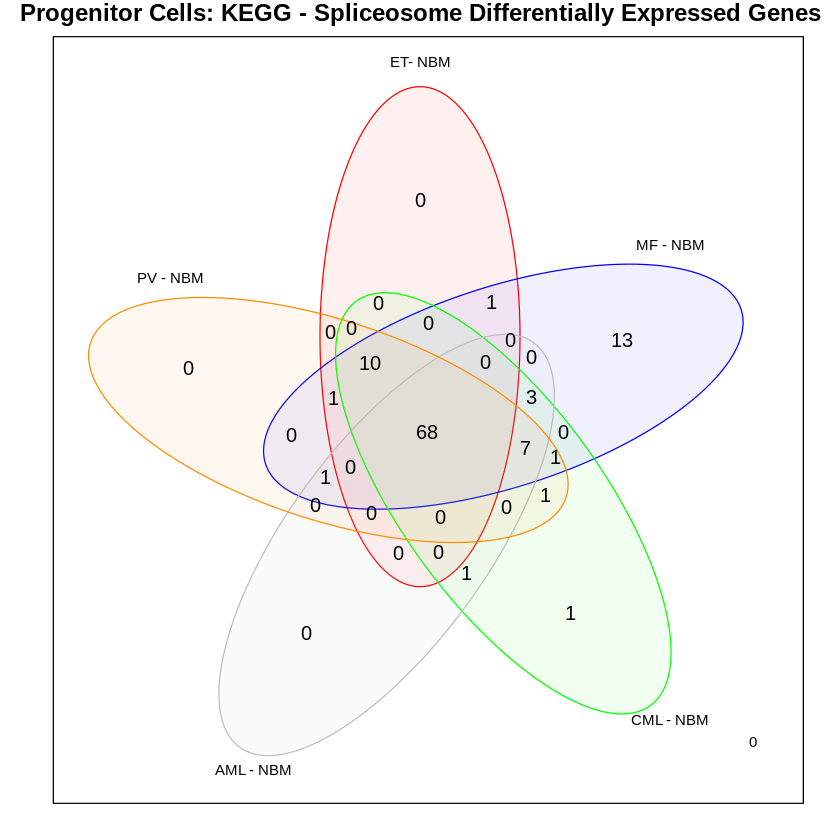

In [83]:
sig.Prog <- unique(unlist(lapply(splicingCat.DEoverlapGenes.Prog, function(x) {
     x[[1]][[1]][[2]]
})))
sig.Prog.ENS <- ENS2EG[ENS2EG$gene_id %in% sig.Prog, "ensembl_id"]
dt.Prog.Spl <- vennInput_withAML[row.names(vennInput_withAML) %in% sig.Prog.ENS,]
dim(dt.Prog.Spl)
colnames(dt.Prog.Spl) <- gsub("Bone Marrow Control","NBM",colnames(vennInput_withAML)) 

#pdf("vennDiagram_NormalBMvsPV_ET_MF_CML_AML_Prog_SpliceosomeDEGenes_Holm_Jamieson.pdf", width=7, height=7)
vennDiagram(dt.Prog.Spl, circle.col=c('red','blue','green', 'gray', "dark orange"), cex=0.75,
           show.include = FALSE, main="Progenitor Cells: KEGG - Spliceosome Differentially Expressed Genes")

#dev.off()

### Preprocessing for Heatmap Creation

In [14]:
risk.colors <- RColorBrewer::brewer.pal(n = 12,name = 'Paired')
names(risk.colors) <- c("AP_CML", "CML", "CP_CML", "CLL", "ET", "PV", "IR_MF", "HR_MF", "MF", "NBM", "placeholder","AML")
risk.colors.sub <- risk.colors[names(risk.colors) %in% c("NBM", "PV", "ET", "MF", "CML", "AML")] 
risk.order <- as.numeric(factor(names(risk.colors.sub), levels=c("NBM", "PV", "ET", "MF", "CML", "AML")))
risk.order
risk.colors.sub2 <- risk.colors.sub[risk.order]
class(risk.colors.sub)

meta2 <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20180326.csv", header=TRUE, stringsAsFactors = FALSE)
#meta2 <- meta2[-grep("X672A.PB.Prog", meta2$Sample),]
meta2$Phenotype <- meta2$Condition_code2
meta2$Phenotype[which(meta2$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "NBM"
meta2_filt <- subset(meta2, Phenotype %in% c("NBM", "MF", "PV", "ET", "CML", "AML") & 
                       Cell.type %in% c("Progenitor"))
meta2_filt$JAK2 <- meta2_filt$Mutation
dim(meta2_filt)
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta2_filt$Mutation <- meta2_filt$JAK2
meta2_filt$JAK2[!meta2_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta2_filt$Tissue <- meta2_filt$Tissue.Type
meta2_filt$Tissue[meta2_filt$Tissue %in% c("Peripheral blood")] <- "Peripheral Blood"
meta2_filt$Cells <- meta2_filt$Cell.type
meta2_filt$Treatment <- as.character(gsub("^p", "P", gsub("_", " ", gsub("_c" ," C", 
                                         gsub("2i", "2 i", gsub("Shh_inhibitor", "Other",meta2_filt$Treatment_code2))))))

gene_counts_new_ord <- gene_counts_new[,match(gsub("_S[0-9]*$", "", meta2_filt$Sample), 
                                             gsub("_S[0-9]*$", "", colnames(gene_counts_new)))]
dim(gene_counts_new_ord)
ord <- order(meta2_filt$Cells, meta2_filt$Phenotype, meta2_filt$Tissue, meta2_filt$JAK2)
meta2_filt2b <- meta2_filt[ord,]
gene_counts_new_ord <- gene_counts_new_ord[,ord]

id_list <- gsub("[.].*$","", rownames(gene_counts_new_ord))
rownames(gene_counts_new_ord) <- id_list
DGE_all <- DGEList(counts = gene_counts_new_ord, lib.size = colSums(gene_counts_new_ord),
                   norm.factors = rep(1,ncol(gene_counts_new_ord)), samples = meta2_filt2b,
                   group = meta2_filt2b$Phenotype, genes = id_list, remove.zeros = FALSE) 

dim(gene_counts_new_ord)
cpm <- cpm(DGE_all)
lcpm <- cpm(DGE_all, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=5
DGE_all_filt <- DGE_all[keep.exprs,, keep.lib.sizes=FALSE]
dim(DGE_all)
DGE_all_filt <- calcNormFactors(DGE_all_filt, method = "TMM")
dim(DGE_all_filt)

lcpm2 <- cpm(DGE_all_filt, log=TRUE)
col.samp.pheno <- samp.type <- factor(meta2_filt2b$Phenotype,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno) <-  risk.colors.sub2
samp.labels <- as.character(meta2_filt2b$Sample.type2)
mycol <- colorpanel(100,"#000066","white","#CC0000")

[1] 5 3 2 4 1 6

[1] "character"

[1] 57 19

[1] 57820    57

[1] 57820    57

[1] 57820    57

[1] 17053    57

In [51]:
splicingCat.DEoverlapGenes.Prog[[3]][[1]][[1]][[2]]

[1] "9716"   "84321"  "11338"  "1659"   "56949"  "6626"   "9984"   "10450" 
  [9] "10523"  "55696"  "3183"   "988"    "4670"   "10291"  "6634"   "4809"  
 [17] "22938"  "6430"   "22985"  "24148"  "51340"  "6625"   "8175"   "26121" 
 [25] "23658"  "1655"   "9343"   "1665"   "3312"   "27339"  "25766"  "55110" 
 [33] "8683"   "6428"   "22916"  "51639"  "23451"  "6432"   "6429"   "10286" 
 [41] "9129"   "58517"  "10285"  "6431"   "11017"  "57187"  "6633"   "6628"  
 [49] "6629"   "51691"  "51690"  "25804"  "6627"   "56259"  "55119"  "84991" 
 [57] "84950"  "3178"   "9128"   "4686"   "51645"  "144983" "9785"   "9775"  
 [65] "10907"  "10262"  "6637"   "23020"  "9879"   "153527" "27316"  "51503" 
 [73] "7307"   "151903" "6427"   "4116"   "23350"  "11157"  "29896"  "10569" 
 [81] "8559"   "6632"   "51362"  "10713"  "5093"   "83443"  "220988" "27258" 
 [89] "5356"   "10465"  "10594"  "9416"   "9092"   "22827"  "10946"  "10189" 
 [97] "10772"  "23450"  "55660"  "11325"  "7919"   "3304"   "3303"   "8449"  
[105] "57461"

## Figure 3C
### Heatmap of DE Spliceosome Genes in NBM vs MF in Progenitor Cells

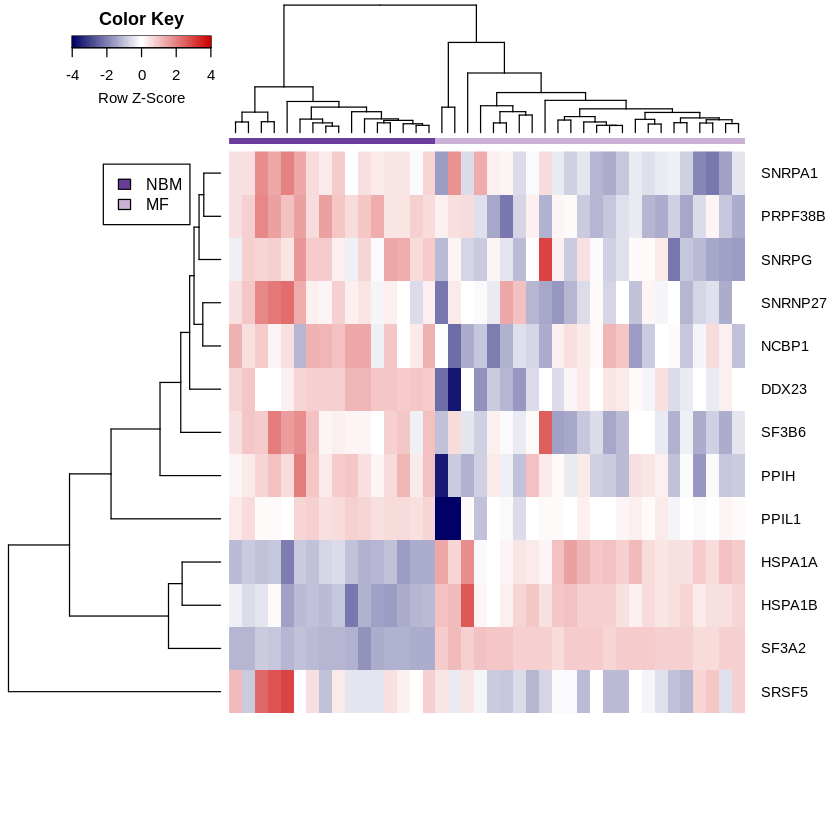

In [98]:
ABMvMF.Prog.Uniq <- rownames(vennInput_withAML)[apply(vennInput_withAML, 1, function(x) {
    (sum(abs(x)) == 1) &  (abs(x[3]) == 1)
})]

KEGG.Splice.sig.ABMvMF.Prog <- splicingCat.DEoverlapGenes.Prog[[3]][[1]][[1]][[2]]
KEGG.Splice.sig.ABMvMF.Prog.ENS <- ENS2EG2SYM[ENS2EG2SYM$gene_id %in% KEGG.Splice.sig.ABMvMF.Prog, "ens_id.ensembl_id"]
KEGG.Splice.sig.ABMvMF.Prog.filt <- KEGG.Splice.sig.ABMvMF.Prog.ENS[KEGG.Splice.sig.ABMvMF.Prog.ENS %in%
                                                                    ABMvMF.Prog.Uniq]
dt.Prog.Spl <- vennInput_withAML[row.names(vennInput_withAML) %in% KEGG.Splice.sig.ABMvMF.Prog.filt,]
colnames(dt.Prog.Spl) <- gsub("Bone Marrow Control","NBM",colnames(vennInput_withAML)) 

lcpm2.KEGG.Splice.sig.ABMvMF.Prog.filt <- lcpm2[rownames(lcpm2) %in% KEGG.Splice.sig.ABMvMF.Prog.filt,
                                               as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")]

samp.type.NBMvMF <- factor(as.character(meta2_filt2b$Phenotype)[as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")], levels=c("NBM", "MF"))
samp.labels.NBMvMF <- as.character(meta2_filt2b$Phenotype)[as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")]
col.samp.pheno.NBMvMF2 <- as.character(col.samp.pheno)[as.character(col.samp.pheno) %in% levels(col.samp.pheno)[c(1,4)]]

#pdf("Holm_Jamieson_Progenitor_NBMvMF_SpliceosomeDEGenes_RNAexpressionHeatmap.pdf", width=8, height=10)
heatmap.2(lcpm2.KEGG.Splice.sig.ABMvMF.Prog.filt, scale="row", cex.lab=0.8,
          labRow=ENS2EG2SYM[match(rownames(lcpm2.KEGG.Splice.sig.ABMvMF.Prog.filt), 
                             gsub("[.].*$","",ENS2EG2SYM$ens_id.ensembl_id)), "SYM"],#
          labCol="", #labRow="",
          col=mycol, trace="none", density.info="none", ColSideColors=col.samp.pheno.NBMvMF2, key=T,
          margin=c(8,6), 
          lhei=c(2,10), 
          dendrogram="both")

legend("topleft", fill = levels(col.samp.pheno)[c(1,4)], 
       legend = levels(samp.type.NBMvMF), 
       inset=c(0,0.1), cex=.8)
#dev.off()